# Análisis de Red de Transporte Aéreo

In [1]:
#Paqueterías
using DelimitedFiles
using StatsBase
using LightGraphs
#using Distributions
#using GLM
#using DataFrames
using Plots, LaTeXStrings
pyplot()

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/StatsBase/EZjIG.ji for StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1184
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186


Plots.PyPlotBackend()

In [89]:
using StatsPlots

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184


### Se crea tabla de información con nodos y enlaces

In [2]:
#SE IMPORTA LA LISTA DE REDES, 521 AEROLÍNEAS, 3 ALIANZAS Y 1 GLOBAL
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2]

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

### Densidad de la red dirigida
$$ D(A, B) = \frac{|E|}{|V| ( |V| - 1 )}$$

con $A$ y $B$ conjuntos,  
$E$ los enlaces y  
$V$ los vértices

### Grado promedio de la red dirigida
$$ c = \frac{m}{n}$$

con  
$m$ los enlaces y  
$n$ los vértices

In [135]:
    leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_in_degree.csv", Float64)
mean(leo_in_degree)

5.1275071633237825

In [ ]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net = ["Airline" "Nodes" "Links" "Density" "Av. Degree" "Av. Betweenness" " Global Clustering Coefficient" "Coverage" "Normalización"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    
    aerolinea_out_degree = string(airline_code, "_out_degree.csv")
    leo_out_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_out_degree", Float64)
    
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    gcc = global_clustering_coefficient(grafo)

    aerolinea_cobertura = string(airline_code, "_layer_coverage.csv")
    leo_cobertura = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/cobertura2/$aerolinea_cobertura", Float64)
    #coberturas = push!(coberturas, leo_cobertura[1])

    normalizacion = leo_cobertura / nodos
    
    renglon = [airline_code nodos enlaces densidad leo_in_degree leo_out_degree promedio_degree av_bet gcc leo_cobertura[1] normalizacion]
    tabla_info_net = vcat(tabla_info_net, renglon)
    
end

return tabla_info_net 

In [136]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net2 = ["Airline" "Nodes" "Links" "Density" "In_Degree" "Out_Degree" "Av._Degree" "Av._Betweenness" " Global_Clustering_Coefficient" "Coverage" "Normalización"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    in_degree = mean(leo_in_degree)
    
    aerolinea_out_degree = string(airline_code, "_out_degree.csv")
    leo_out_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_out_degree", Float64)
    out_degree = mean(leo_out_degree)
    
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    gcc = global_clustering_coefficient(grafo)

    aerolinea_cobertura = string(airline_code, "_layer_coverage.csv")
    leo_cobertura = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/cobertura2/$aerolinea_cobertura", Float64)
    #coberturas = push!(coberturas, leo_cobertura[1])

    normalizacion = leo_cobertura / nodos
    
    renglon = [airline_code nodos enlaces densidad in_degree out_degree promedio_degree av_bet gcc leo_cobertura[1] normalizacion]
    tabla_info_net2 = vcat(tabla_info_net2, renglon)
    
end

return tabla_info_net2

526×11 Array{Any,2}:
 "Airline"            "Nodes"  …     "Coverage"   "Normalización"
 "global"         3072            543.748        0.177001        
 "Star_Alliance"   934            384.347        0.411507        
 "Sky_Team"        900            288.584        0.320648        
 "oneworld"        698            141.492        0.202711        
 "AA"              259         …   57.159        0.220691        
 "TK"              242            232.862        0.96224         
 "DL"              230             67.1714       0.29205         
 "MU"              192            180.858        0.941967        
 "CZ"              188            126.27         0.671648        
 "UA"              184         …  120.547        0.655149        
 "FR"              176            164.743        0.936038        
 "BA"              175            174.089        0.994793        
 ⋮                             ⋱                 ⋮               
 "H7"                2              2.0          1.0   

In [138]:
writedlm("/Users/yuriko/Desktop/tabla_info_net2.csv", tabla_info_net2, '\t')

In [140]:
leo_info_net2 = readdlm("/Users/yuriko/Desktop/tabla_info_net2.csv", Any)

526×11 Array{Any,2}:
 "Airline"            "Nodes"  …     "Coverage"   "Normalización"
 "global"         3072            543.748        0.177001        
 "Star_Alliance"   934            384.347        0.411507        
 "Sky_Team"        900            288.584        0.320648        
 "oneworld"        698            141.492        0.202711        
 "AA"              259         …   57.159        0.220691        
 "TK"              242            232.862        0.96224         
 "DL"              230             67.1714       0.29205         
 "MU"              192            180.858        0.941967        
 "CZ"              188            126.27         0.671648        
 "UA"              184         …  120.547        0.655149        
 "FR"              176            164.743        0.936038        
 "BA"              175            174.089        0.994793        
 ⋮                             ⋱                 ⋮               
 "H7"                2              2.0          1.0   

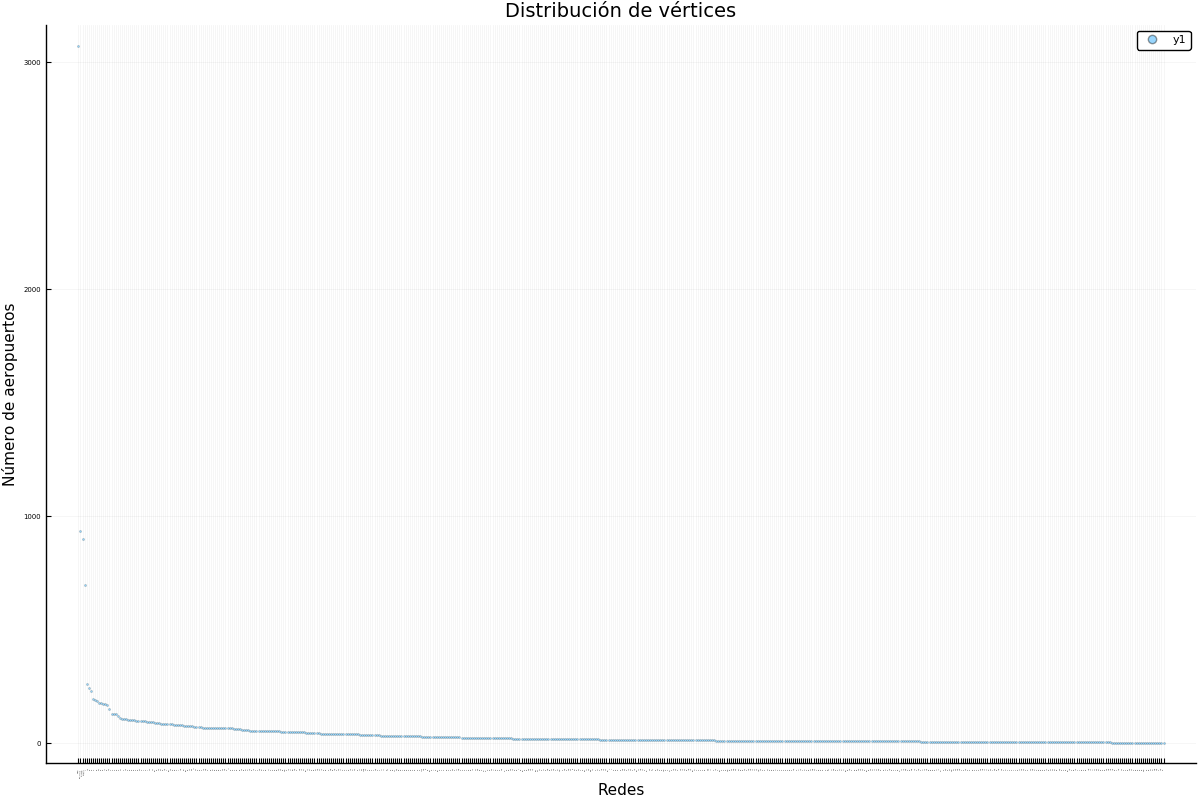

In [141]:
#Scatter plot para número de nodos.

#w = tabla_info_net[:, 2] #Nodos
#c = tabla_info_net[:, 9] #Coberturas

x = leo_info_net2[2:end, 1]
x = convert(Array{String,1}, x)
#@show x
y = leo_info_net2[2:end, 2]
y = convert(Array{Int64,1}, y)

#equation(x) = coef_r[2]*x + coef_r[1]

scat = scatter(y,
    #color = "#0f87bf",
    title = "Distribución de vértices",
    xlabel = "Redes",
    ylabel = "Número de aeropuertos",
    legend = true,
    gridalpha = 0.05,
    minorgridlinewidth = 0.1,
    markersize = 1.5,
    markerstrokewidth = 0.1,
    xticks = (1:525, x),
    #yticks = :all,
    xtickfont = (1, "Courier"),
    ytickfont = (5, "Courier"),
    xrotation = 87,
    size = (1200, 800),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:1000,
#    legend = true,
#    legendtitle = L"R^{2}",
#    label = "$r_2")
#


In [69]:
savefig(scat, "/Users/yuriko/Desktop/prueba2.pdf")

In [142]:
#Nombres
x = leo_info_net2[2:end, 1]
x = convert(Array{String,1}, x)
#Nodos
y = leo_info_net2[2:end, 2]
y = convert(Array{Int64,1}, y)
#Aristas
z = leo_info_net2[2:end, 3]
z = convert(Array{Int64,1}, z)
#Densidad
w = leo_info_net2[2:end, 4]
w = convert(Array{Float64,1}, w)
#In degree
p = leo_info_net2[2:end, 5]
p = convert(Array{Float64,1}, p)
#Out degree
q = leo_info_net2[2:end, 6]
q = convert(Array{Float64,1}, q)
#Av degree
v = leo_info_net2[2:end, 7]
v = convert(Array{Float64,1}, v)
#Betweenness
u = leo_info_net2[2:end, 8]
u = convert(Array{Float64,1}, u)
#GCC
t = leo_info_net2[2:end, 9]
t = convert(Array{Float64,1}, t)
#Cov
s = leo_info_net2[2:end, 10]
s = convert(Array{Float64,1}, s)
#Norm
r = leo_info_net2[2:end, 11]
r = convert(Array{Float64,1}, r)

525-element Array{Float64,1}:
 0.17700121667650007
 0.41150687334070035
 0.3206484938271605 
 0.20271083570742437
 0.22069110478376888
 0.9622396011201422 
 0.29204971644612476
 0.9419669596354167 
 0.6716480873698506 
 0.6551488657844989 
 0.9360379003099173 
 0.9947934693877547 
 0.661931787452677  
 ⋮                  
 1.0                
 1.0                
 0.75               
 1.0                
 1.0                
 1.0                
 1.0                
 1.0                
 1.0                
 1.0                
 1.0                
 1.0                

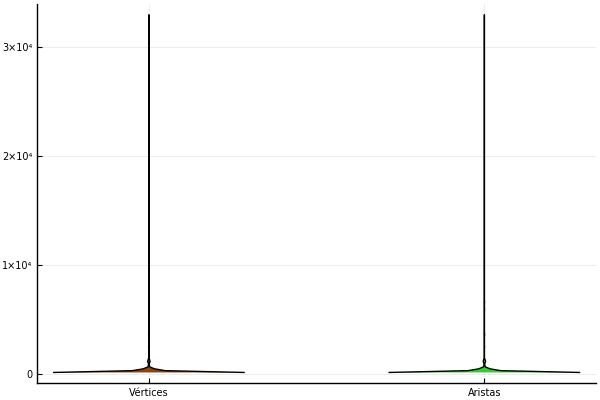

In [263]:
v1=violin(["Vértices"],y,leg=false, tickfontsize=7, color=:SaddleBrown)#, title="Distribuciones de Vértices y Aristas")
violin!(["Aristas"],z,leg=false, color=:LimeGreen)
#savefig(v1, "/Users/yuriko/Desktop/violin_va.pdf")

In [174]:
savefig(scat, "/Users/yuriko/Desktop/prueba2.pdf")

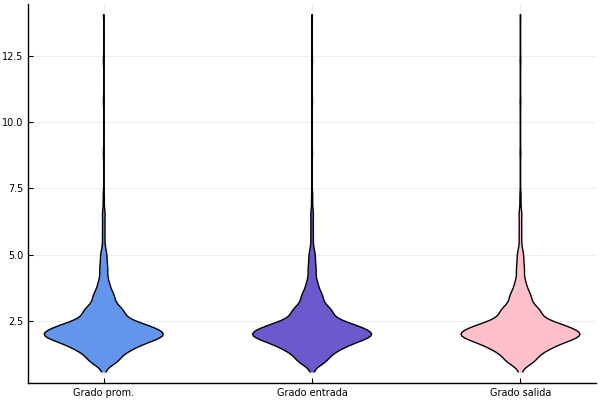

In [260]:
v2=violin(["Grado prom."], v, leg=false, tickfontsize=7, color=:CornflowerBlue)#, title="Distribuciones de Grado")
violin!(["Grado entrada"], p, leg=false, color=:SlateBlue)
violin!(["Grado salida"], q, leg=false, color=:Pink)
#savefig(v2, "/Users/yuriko/Desktop/violin_gr.pdf")

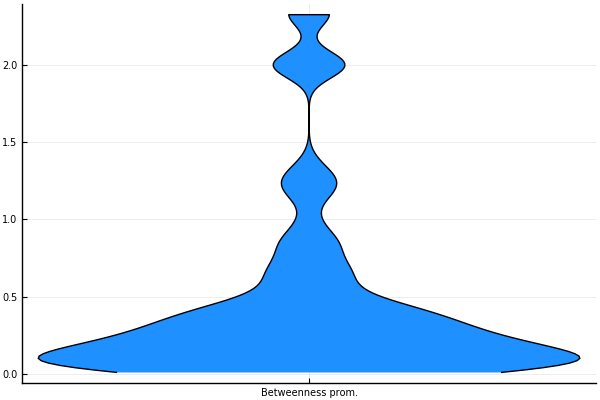

In [256]:
v3=#violin(["Densidad"], w, leg=false)#, title="Distribuciones de Medidas")
violin(["Betweenness prom."], u, leg=false, tickfontsize=7, color=:DodgerBlue)
#violin!(["CCG"], t, leg=false)
#savefig(v3, "/Users/yuriko/Desktop/violin_med.pdf")

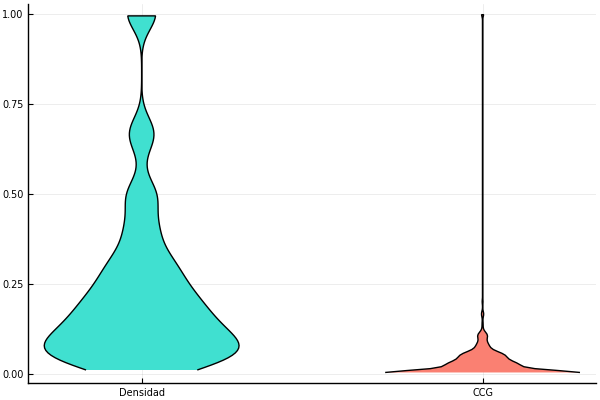

In [242]:
v7=violin(["Densidad"], w, leg=false, tickfontsize=7, color=:Turquoise)
violin!(["CCG"], t, leg=false, color=:Salmon)

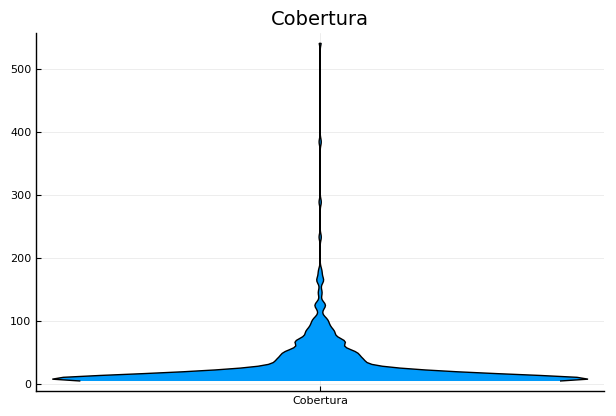

In [169]:
v4=violin(["Cobertura"],s,leg=false, title="Cobertura")
savefig(v4, "/Users/yuriko/Desktop/violin_cob.pdf")

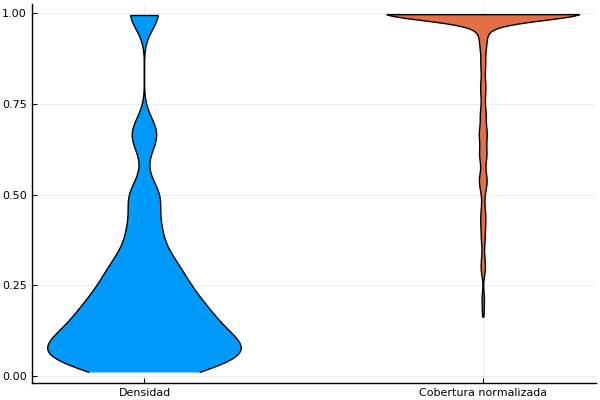

In [196]:
violin(["Densidad"], w, leg=false)
violin!(["Cobertura normalizada"],r,leg=false)

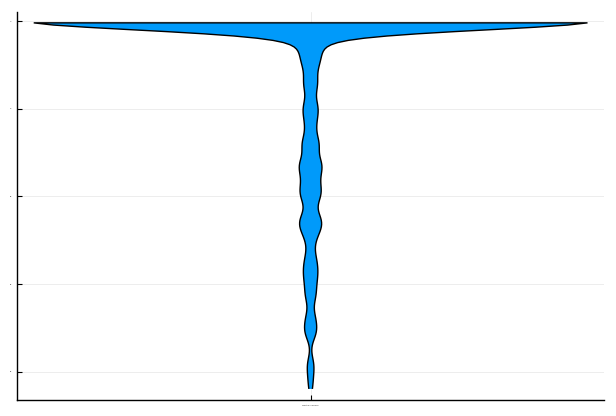

In [235]:
v5=violin(["Cobertura normalizada"],r,leg=false, tickfontsize=1)#, title="Cobertura Normalizada")
savefig(v5, "/Users/yuriko/Desktop/violin_cob_norm.pdf")

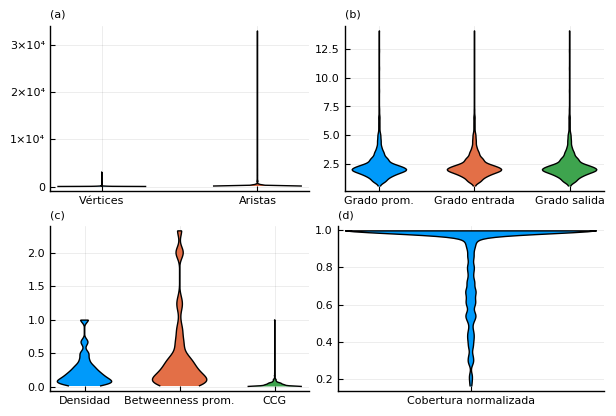

In [194]:
vt=plot(v1,v2,v3,v5,layout=(2,2),legend=false, title=["(a)" "(b)" "(c)" "(d)"], titleloc=:left, titlefont = font(8))
savefig(vt, "/Users/yuriko/Desktop/vdiferentes iolines.pdf")

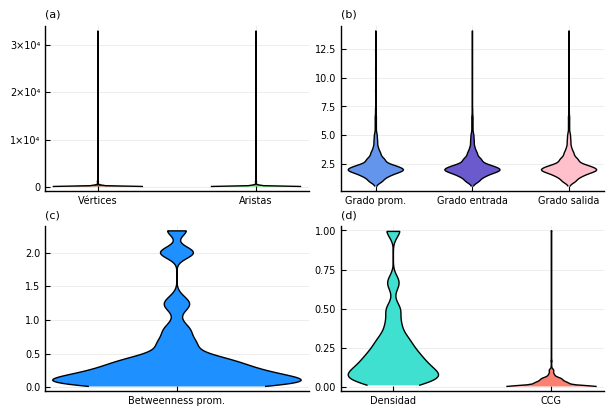

In [265]:
vtot=plot(v1,v2,v3,v7,layout=(2,2),legend=false, title=["(a)" "(b)" "(c)" "(d)"], titleloc=:left, titlefont = font(8))
savefig(vtot, "/Users/yuriko/Desktop/distribs_violines.pdf")

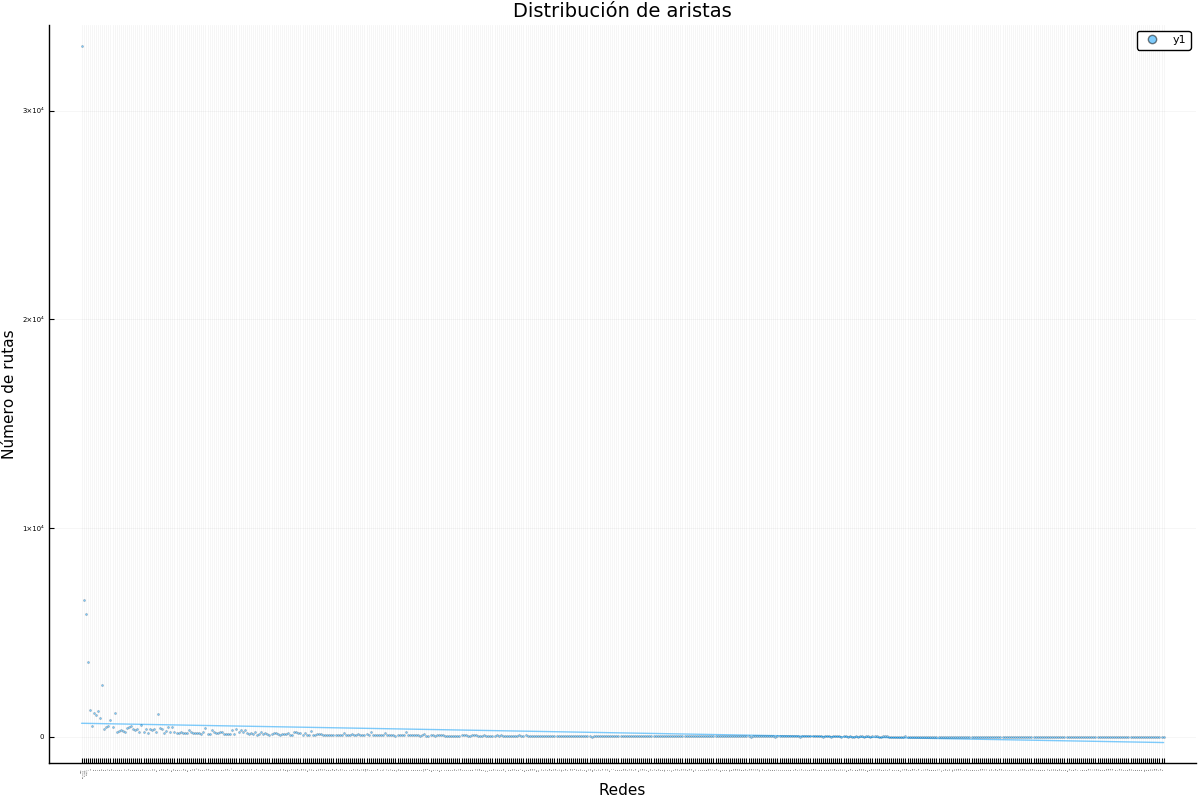

In [227]:
#Scatter plot para número de links.

x = leo_info_net[2:end, 1]
x = convert(Array{String,1}, x)
#@show x
y = leo_info_net[2:end, 3] #enlaces
y = convert(Array{Int64,1}, y)


scat1 = scatter(y,
    #color = "#0f87bf",
    title = "Distribución de aristas",
    xlabel = "Redes",
    ylabel = "Número de rutas",
    legend = true,
    gridalpha = 0.05,
    minorgridlinewidth = 0.1,
    markersize = 1.5,
    markerstrokewidth = 0.1,
    xticks = (1:525, x),
    #yticks = :all,
    xtickfont = (1, "Courier"),
    ytickfont = (5, "Courier"),
    xrotation = 87,
    size = (1200, 800),
    #aspect_ratio= 1,
    alpha = 0.5, smooth=true)



In [75]:
savefig(scat1, "/Users/yuriko/Desktop/links_distrib.pdf")

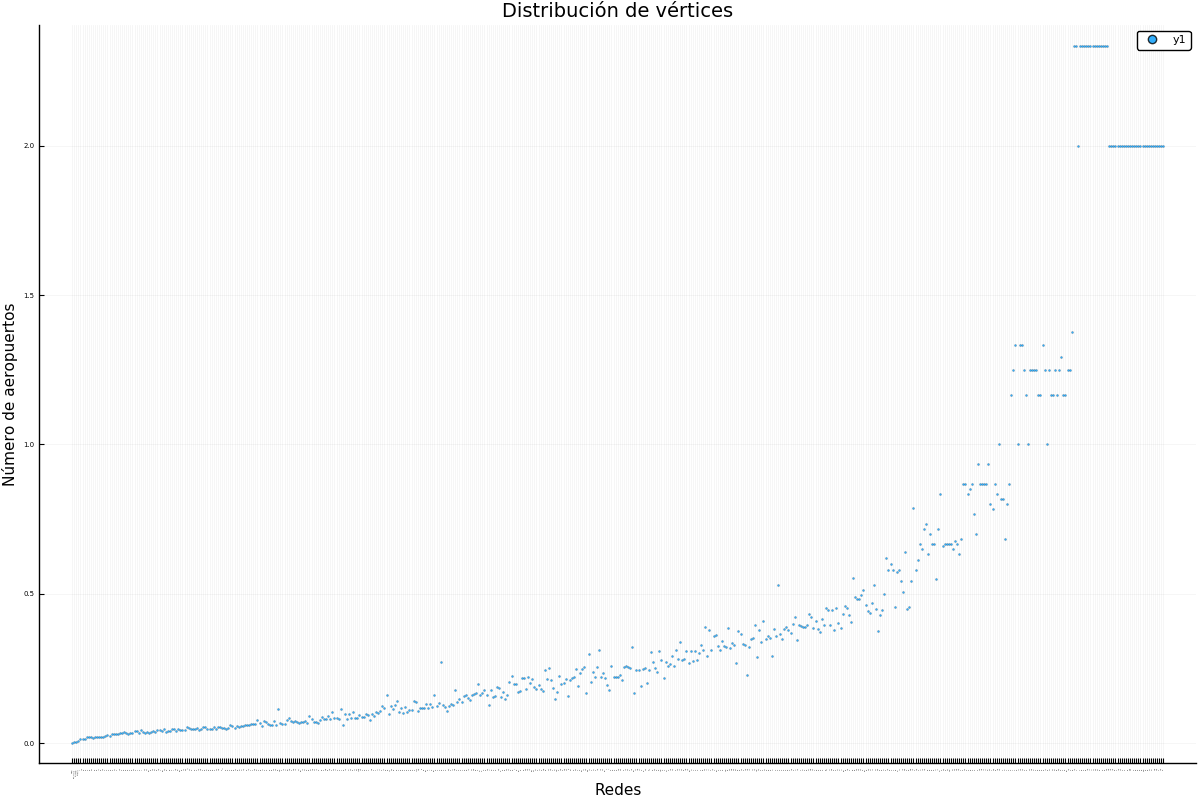

In [82]:
#Scatter plot para número de nodos.

#w = tabla_info_net[:, 2] #Nodos
#c = tabla_info_net[:, 9] #Coberturas

x = leo_info_net[2:end, 1]
x = convert(Array{String,1}, x)
#@show x
y = leo_info_net[2:end, 6]
y = convert(Array{Float64,1}, y)

#equation(x) = coef_r[2]*x + coef_r[1]

scat = scatter(y,
    #color = "#0f87bf",
    title = "Distribución de vértices",
    xlabel = "Redes",
    ylabel = "Número de aeropuertos",
    legend = true,
    gridalpha = 0.05,
    minorgridlinewidth = 0.1,
    markersize = 1.5,
    markerstrokewidth = 0.1,
    xticks = (1:525, x),
    #yticks = :all,
    xtickfont = (1, "Courier"),
    ytickfont = (5, "Courier"),
    xrotation = 87,
    size = (1200, 800),
    #aspect_ratio= 1,
    alpha = 0.8)
#plot!(equation, 1:1000,
#    legend = true,
#    legendtitle = L"R^{2}",
#    label = "$r_2")
#


In [69]:
savefig(scat, "/Users/yuriko/Desktop/prueba2.pdf")

In [94]:
#?betweenness_centrality

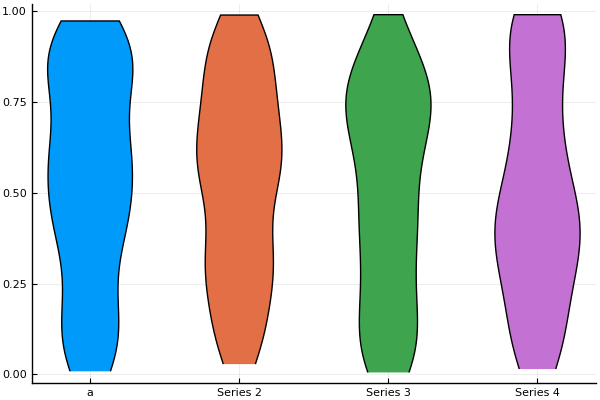

In [93]:
y = rand(100,4) # Four series of 100 points each
violin(["a" "Series 2" "Series 3" "Series 4"],y,leg=false)

In [91]:
y

100×4 Array{Float64,2}:
 0.295926   0.0148663  0.0734629  0.0949765
 0.819041   0.469639   0.931811   0.677176 
 0.722468   0.60066    0.309092   0.486831 
 0.170853   0.18854    0.109208   0.106878 
 0.425787   0.788554   0.917445   0.696795 
 0.203726   0.899148   0.431192   0.584117 
 0.940451   0.132956   0.161768   0.616192 
 0.389645   0.588273   0.826469   0.482871 
 0.520878   0.0257723  0.211299   0.463574 
 0.357675   0.0834048  0.589841   0.504878 
 0.601611   0.989323   0.162863   0.227794 
 0.767642   0.163429   0.611411   0.42926  
 0.433529   0.654266   0.405405   0.267646 
 ⋮                                         
 0.663245   0.557705   0.184711   0.330108 
 0.687457   0.943091   0.481816   0.944021 
 0.829966   0.237517   0.998693   0.582256 
 0.793701   0.709163   0.884715   0.491046 
 0.13367    0.90625    0.489172   0.652597 
 0.879722   0.532938   0.83931    0.292904 
 0.0167266  0.654479   0.570265   0.382077 
 0.704673   0.777803   0.429691   0.693823 
 0.37805

## Ejemplo GLM (Linear regression)

In [ ]:
data1 = DataFrame(X=[1,2,3], Y=[2,4,7])

In [ ]:
typeof(data1)

In [ ]:
ols = lm(@formula(Y ~ X), data1)

# Función para encontrar la regresión lineal

In [7]:
function regresion_lineal(N::String, V::String)
    
    if N == "Global y Alianzas"
        k1 = 2
        k2 = 5
        
        elseif N == "Alianzas"
            k1 = 3
            k2 = 5
            
            elseif N == "Alianzas y Aerolíneas"
                k1 = 3
                k2 = length(lista_aerolineas)
   
                
                elseif N == "Aerolíneas"
                    k1 = 6
                    k2 = length(lista_aerolineas)
        
                    elseif N == "Todo"
                    k1 = 2
                    k2 = length(lista_aerolineas)
                
    end
    
    if V == "Nodes"
        c = 2
        t = Int64
        
        elseif V == "Links"
            c = 3
            t = Int64
            
            elseif V == "Density"
                c = 4
                t = Float64
                
                elseif V == "Av. Degree"
                    c = 5
                    t = Float64
                    
                    elseif V == "Av. Betweenness"
                        c = 6
                        t = Float64
                        
                        elseif V == "Global Clustering Coefficient"
                            c = 7
                            t = Float64
                            
                       
    end
    
    columna_x = tabla_info_net[:, c] #columna propiedad buscada (x)
    x = columna_x[k1:k2]
    x = convert(Array{t,1}, x)
    
    columna_y = tabla_info_net[:, 9] #columna cobertura normalizada (y)
    y = columna_y[k1:k2]
    y = convert(Array{Float64,1}, y)
    

    
    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    
    return cov
    
end

regresion_lineal (generic function with 1 method)

In [8]:
function regresion_lineal_cob(N::String, V::String)
    
    if N == "Global y Alianzas"
        k1 = 2
        k2 = 5
        
        elseif N == "Alianzas"
            k1 = 3
            k2 = 5
            
            elseif N == "Alianzas y Aerolíneas"
                k1 = 3
                k2 = length(lista_aerolineas)
   
                
                elseif N == "Aerolíneas"
                    k1 = 6
                    k2 = length(lista_aerolineas)
        
                    elseif N == "Todo"
                    k1 = 2
                    k2 = length(lista_aerolineas)
                
    end
    
    if V == "Nodes"
        c = 2
        t = Int64
        
        elseif V == "Links"
            c = 3
            t = Int64
            
            elseif V == "Density"
                c = 4
                t = Float64
                
                elseif V == "Av. Degree"
                    c = 5
                    t = Float64
                    
                    elseif V == "Av. Betweenness"
                        c = 6
                        t = Float64
                        
                        elseif V == "Global Clustering Coefficient"
                            c = 7
                            t = Float64
                            
                       
    end
    
    columna_x = tabla_info_net[:, c] #columna propiedad buscada (x)
    x = columna_x[k1:k2]
    x = convert(Array{t,1}, x)
    
    columna_y = tabla_info_net[:, 8] #columna cobertura (y)
    y = columna_y[k1:k2]
    y = convert(Array{Float64,1}, y)
    
    #y_cobertura = Array{Float64}(undef, 0)
    
    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    
    return cov
    
end

regresion_lineal_cob (generic function with 1 method)

## Análisis de coberturas para Nodos 

### Encontramos la regresión lineal (Global y Alianzas)

In [9]:
reg_n_ga = regresion_lineal("Global y Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate  Std.Error   t value Pr(>|t|)
(Intercept)     0.352411  0.0980953   3.59253   0.0695
x1           -5.31362e-5 5.75868e-5 -0.922715   0.4536


In [10]:
coef_r = round.(coef(reg_n_ga), digits=6)

2-element Array{Float64,1}:
  0.352411
 -5.3e-5  

In [11]:
r_2 = round.(r2(reg_n_ga), digits=3)

0.299

### Gráfica de cobertura (Nodos vs. Cobertura. Global & Alianzas)

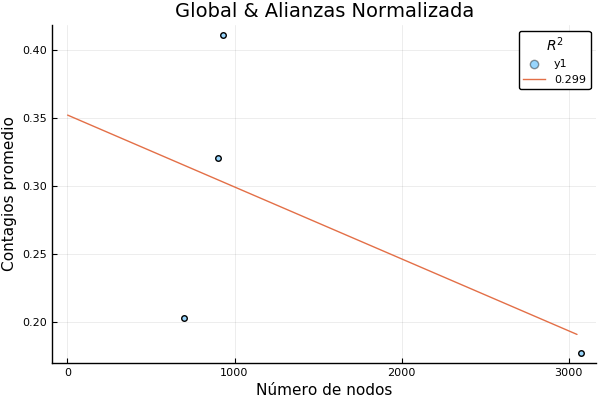

In [12]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]
#@show y
equation(x) = coef_r[2]*x + coef_r[1]

nvzc_gaN = scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)

plot!(equation, 1:3050, 
    legend = true,
    legendtitle = L"R^{2}",
    label = "$r_2")



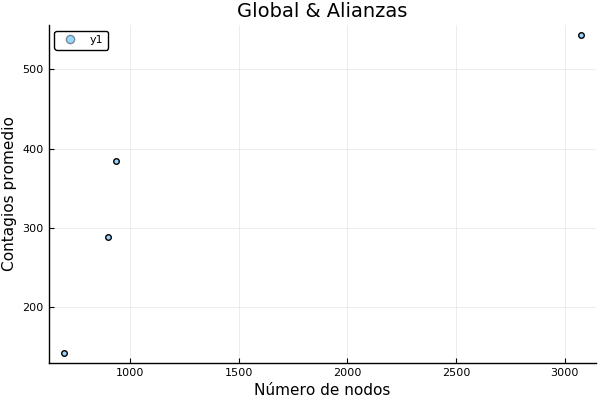

In [10]:

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 0.129*x + 159.523

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:3050, 
#    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [11]:
reg_n_al = regresion_lineal("Alianzas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate Std.Error  t value Pr(>|t|)
(Intercept)    -0.346843  0.216343 -1.60321   0.3550
x1           0.000780172 0.0002544  3.06671   0.2007


In [12]:
coef_r = round.(coef(reg_n_al), digits=6)

2-element Array{Float64,1}:
 -0.346843
  0.00078 

In [13]:
r_2 = round.(r2(reg_n_al), digits=5)

0.90389

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas)

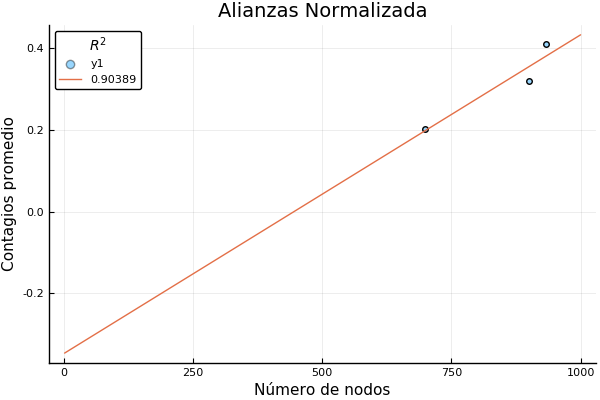

In [14]:
# Nodos vs. Cobertura Normalizada. Alianzas
w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:1000,
    legend = true,
    legendtitle = L"R^{2}",
    label = "$r_2")


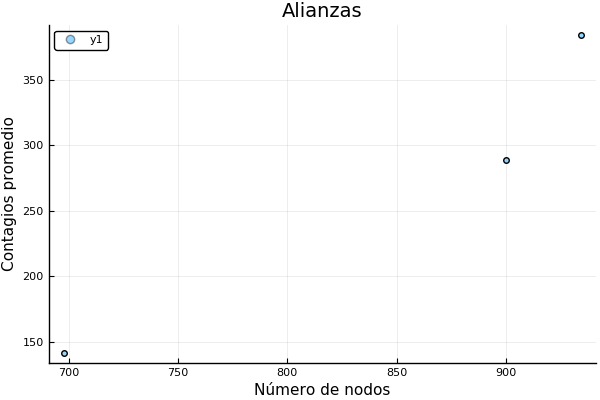

In [15]:
# Nodos vs. Cobertura. Alianzas NO Normalizada
w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 0.923*x - 507.034

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:1000,
#    legend = true)
#

El error en cuanto a la intersección es muy grande porque solo se tienen 3 puntos para la regresión lineal. 
Se podría decir que con mayor cantidad de nodos en la red de alianzas, la cobertura de contagios es mayor.

## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [16]:
reg_n_aa = regresion_lineal("Alianzas y Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error  t value Pr(>|t|)
(Intercept)      0.915781 0.00940744  97.3465   <1e-99
x1           -0.000710757 0.00011859 -5.99339    <1e-8


In [17]:
coef_r = round.(coef(reg_n_aa), digits=6)

2-element Array{Float64,1}:
  0.915781
 -0.000711

In [18]:
r_2 = round.(r2(reg_n_aa), digits=5)

0.06438

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

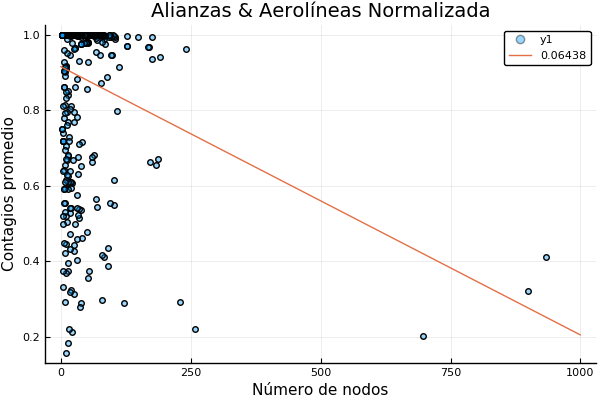

In [19]:
# Nodos vs. Cobertura Normalizada. Alianzas & Aerolíneas
w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1000, 
    legend = true,
    label = "$r_2")


In [20]:
regc_n_aa = regresion_lineal_cob("Alianzas y Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   11.8424  0.948903 12.4801   <1e-30
x1           0.430781 0.0119619 36.0128   <1e-99


In [21]:
coef_r = round.(coef(regc_n_aa), digits=6)

2-element Array{Float64,1}:
 11.842421
  0.430781

In [22]:
rc_2 = round.(r2(regc_n_aa), digits=5)

0.71302

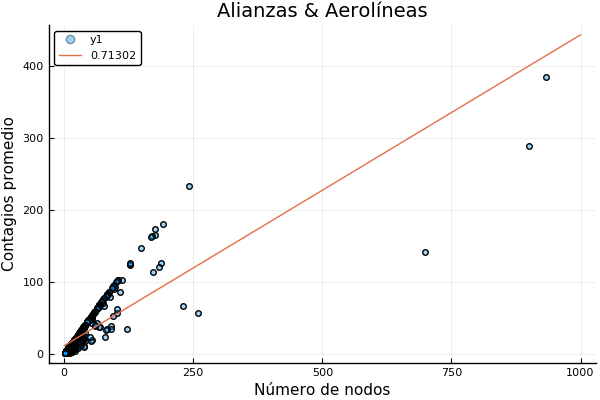

In [24]:
# Nodos vs. Cobertura No Normalizada. Alianzas & Aerolíneas

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1000, 
    legend = true,
    label = "$rc_2")


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [25]:
reg_n_aer = regresion_lineal("Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate   Std.Error  t value Pr(>|t|)
(Intercept)      0.917403   0.0109301  83.9336   <1e-99
x1           -0.000765886 0.000234917 -3.26025   0.0012


In [26]:
coef_r = round.(coef(reg_n_aer), digits=6)

2-element Array{Float64,1}:
  0.917403
 -0.000766

In [27]:
r_2 = round.(r2(reg_n_aer), digits=5)

0.02007

### Gráfica de cobertura (Nodos vs. Cobertura. Aerolíneas)

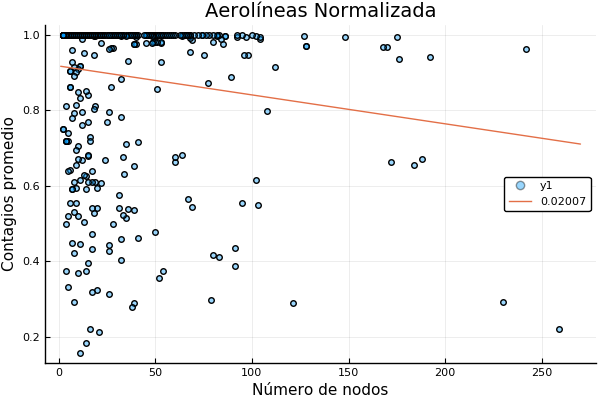

In [28]:
# Nodos vs. Cobertura Normalizada. Aerolíneas

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:270, 
    legend = true,
    label = "$r_2")


In [29]:
regc_n_aer = regresion_lineal_cob("Aerolíneas", "Nodes")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)    2.4512  0.683178 3.58794   0.0004
x1           0.775575 0.0146833 52.8203   <1e-99


In [30]:
coef_r = round.(coef(regc_n_aer), digits=6)

2-element Array{Float64,1}:
 2.451202
 0.775575

In [31]:
rc_2 = round.(r2(regc_n_aer), digits=5)

0.84315

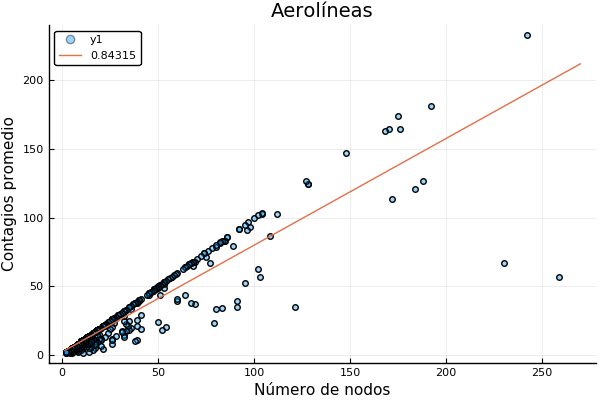

In [32]:
# Nodos vs. Cobertura No Normalizada. Aerolíneas

w = tabla_info_net[:, 2] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end

equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de nodos",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:270, 
    legend = true,
    label = "$rc_2")


En general, en cuanto a la relación de la cobertura de contagios respecto al número de nodos de la red, es lineal.

## Análisis de coberturas para Enlaces

### Encontramos la regresión lineal (Global y Alianzas)

In [33]:
reg_l_ga = regresion_lineal("Global y Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                Estimate  Std.Error   t value Pr(>|t|)
(Intercept)     0.330314  0.0796054    4.1494   0.0535
x1           -4.26421e-6 4.62412e-6 -0.922168   0.4538


In [34]:
coef_r = round.(coef(reg_l_ga), digits=6)

2-element Array{Float64,1}:
  0.330314
 -4.0e-6  

In [35]:
r_2 = round.(r2(reg_l_ga), digits=5)

0.29834

### Gráfica de cobertura (Links vs. Cobertura. Global & Alianzas)

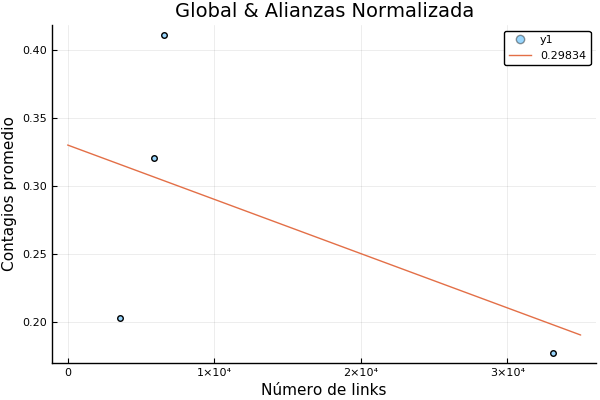

In [36]:
# Enlaces vs. Cobertura Normalizada. Global & Alianzas


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = coef_r[2]*x + coef_r[1] #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:35000, 
    legend = true,
    label = "$r_2")


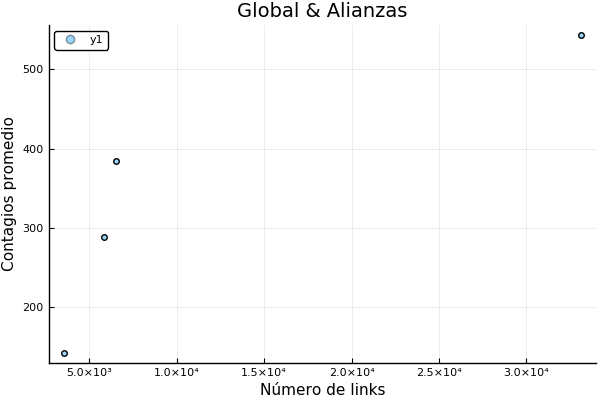

In [37]:
# Enlaces vs. Cobertura No Normalizada. Global & Alianzas


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 0.010*x + 213.126 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:35000, 
#    legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [38]:
reg_l_al = regresion_lineal("Alianzas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate  Std.Error   t value Pr(>|t|)
(Intercept)  -0.0371752   0.084347 -0.440741   0.7357
x1           6.53546e-5 1.53728e-5   4.25131   0.1471


In [39]:
coef_r = round.(coef(reg_l_al), digits=6)

2-element Array{Float64,1}:
 -0.037175
  6.5e-5  

In [40]:
r_2 = round.(r2(reg_l_al), digits=5)

0.94757

### Gráfica de cobertura (Links vs. Cobertura. Alianzas)

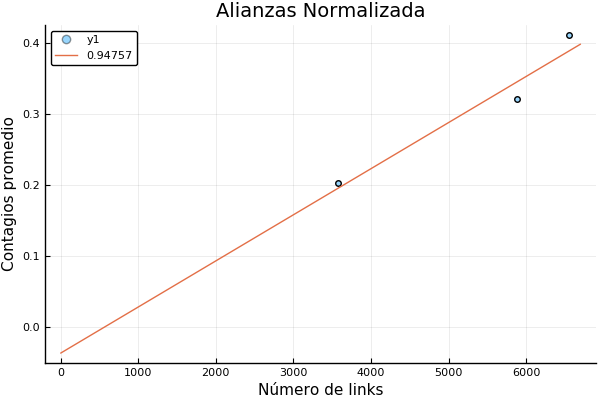

In [41]:
# Enlaces vs. Cobertura Normalizada. Alianzas 

w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = coef_r[2]*x + coef_r[1] #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
    legend = true,
    label = "$r_2")


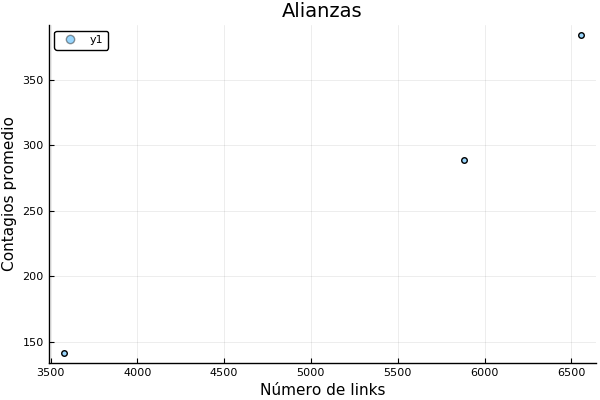

In [42]:
# Enlaces vs. Cobertura No Normalizada. Alianzas 


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 0.077*x - 138.752 #CAmbiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
#    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [43]:
reg_l_aa = regresion_lineal("Alianzas y Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error t value Pr(>|t|)
(Intercept)      0.904557 0.00889736 101.666   <1e-99
x1           -0.000102063 1.90712e-5 -5.3517    <1e-6


In [44]:
coef_r = round.(coef(reg_l_aa), digits=6)

2-element Array{Float64,1}:
  0.904557
 -0.000102

In [45]:
r_2 = round.(r2(reg_l_aa), digits=5)

0.05201

### Gráfica de cobertura (Nodos vs. Cobertura. Alianzas & Aerolíneas)

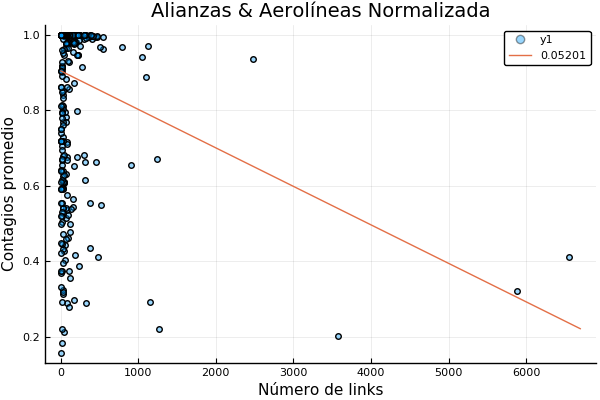

In [46]:
# Enlaces vs. Cobertura Normalizada. Alianzas & Aerolíneas


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = coef_r[2]*x + coef_r[1] #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:6700, 
     legend = true,
    label = "$r_2")


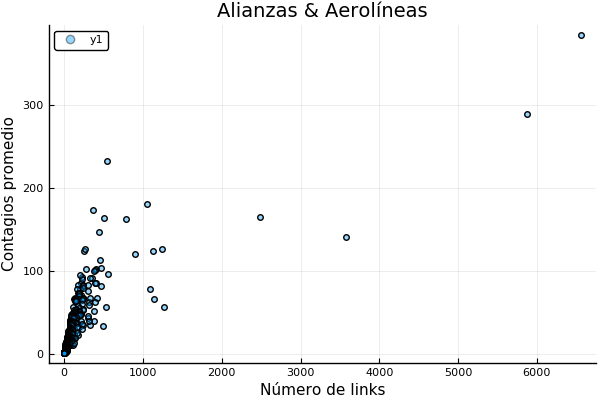

In [47]:
# Enlaces vs. Cobertura No Normalizada. Alianzas & Aerolíneas


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -0.000102063*x + 0.904557 #CAMBIAr

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:6700, 
 #legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [48]:
reg_l_aer = regresion_lineal("Aerolíneas", "Links")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error  t value Pr(>|t|)
(Intercept)      0.905109 0.00957903  94.4886   <1e-99
x1           -0.000104978 4.48772e-5 -2.33922   0.0197


In [49]:
coef_r = round.(coef(reg_l_aer), digits=6)

2-element Array{Float64,1}:
  0.905109
 -0.000105

In [50]:
r_2 = round.(r2(reg_l_aer), digits=5)

0.01043

### Gráfica de cobertura (Links vs. Cobertura. Aerolíneas)

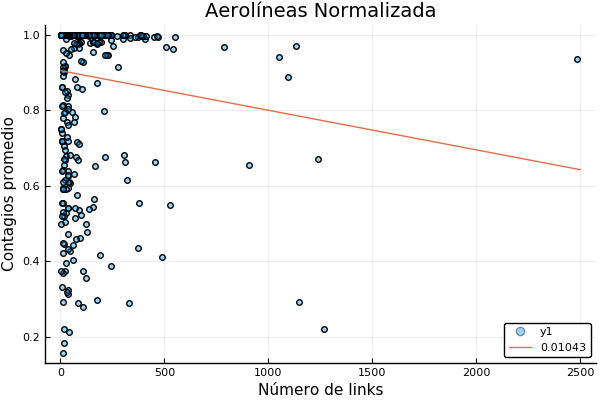

In [51]:
# Enlaces vs. Cobertura Normalizada. Aerolíneas


w = tabla_info_net[:, 3] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = coef_r[2]*x + coef_r[1] 

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 1:2500, 
    legend = true,
    label = "$r_2")


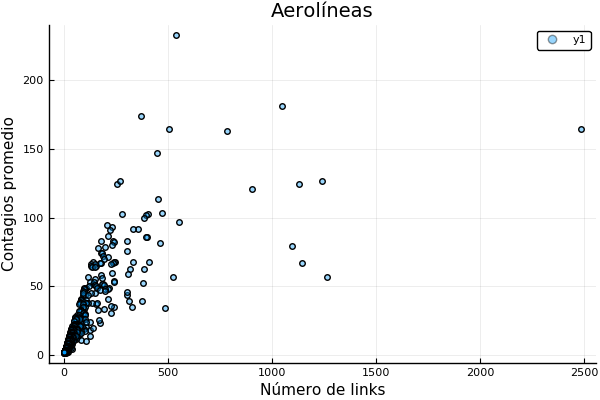

In [52]:
# Enlaces vs. Cobertura No Normalizada. Aerolíneas


w = tabla_info_net[:, 3] #Enlaces
c = tabla_info_net[:, 8] #Coberturas

x = Array{Int64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = 0.120*x + 13.728 #CAMBUar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Número de links",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 1:2500, 
#    legend = true)


En general, en cuanto a la dependencia de la cobertura de contagios respecto al número de enlaces de la red, 
es una lineal, A mayor número de enlaces, mayor cobertura.

# Análisis de coberturas para Densidad

### Encontramos la regresión lineal (Global y Alianzas)

In [13]:
reg_d_ga = regresion_lineal("Global y Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.0469201  0.201561 0.232783   0.8376
x1             36.0302   30.4065  1.18495   0.3578


In [14]:
coef_r = round.(coef(reg_d_ga), digits=6)

2-element Array{Float64,1}:
  0.04692 
 36.030221

In [15]:
r_2 = round.(r2(reg_d_ga), digits=5)

0.41247

### Gráfica de cobertura (Densidad vs. Cobertura. Global & Alianzas)

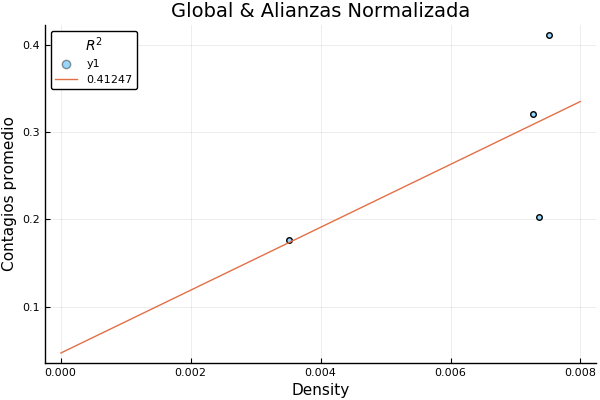

In [16]:
# Densidad vs. Cobertura Normalizada. Global & Alianzas


w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = coef_r[2]*x + coef_r[1] #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.008, 
    legend = true,
    legendtitle = L"R^2",
    label = "$r_2")


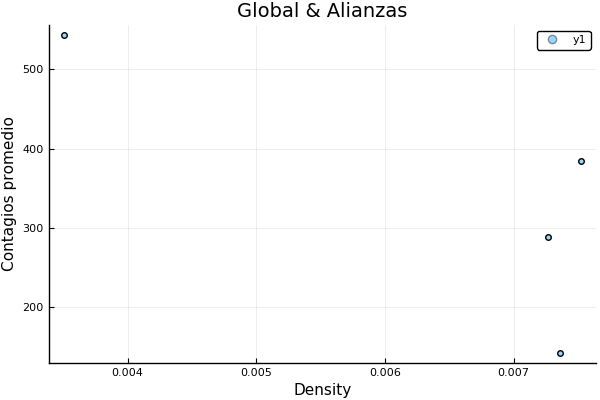

In [17]:
# Densidad vs. Cobertura No Normalizada. Global & Alianzas


w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]


#equation(x) = -68562.1*x + 780.03 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
#    legend = true)


## Análisis de densidad y coberturas (Alianzas)

### Encontramos la regresión

In [18]:
reg_d_al = regresion_lineal("Alianzas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error   t value Pr(>|t|)
(Intercept)  -3.14557   4.91306 -0.640246   0.6375
x1              468.4   665.583  0.703744   0.6096


In [19]:
coef_r = round.(coef(reg_d_al), digits=6)

2-element Array{Float64,1}:
  -3.145569
 468.4005  

In [20]:
r_2 = round.(r2(reg_d_al), digits=5)

0.33122

### Gráfica de cobertura (Density vs. Cobertura. Alianzas)

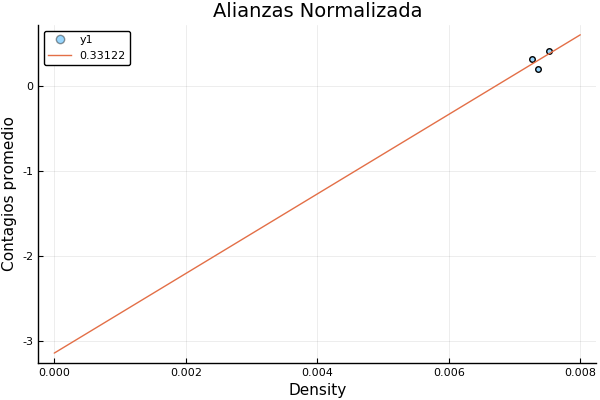

In [21]:
# Densidad vs. Cobertura Normalizada. Alianzas 

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.008, 
    legend = true,
    label = "$r_2")


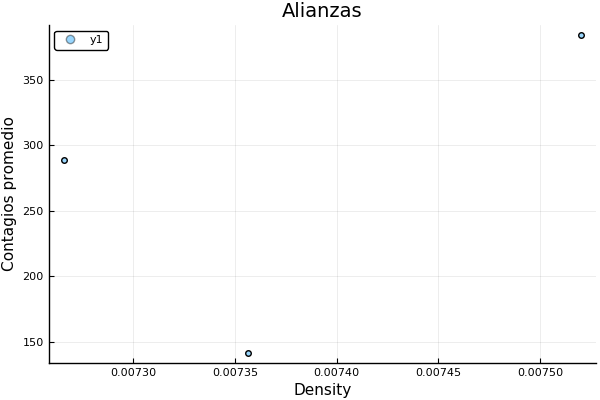

In [22]:
# Densidad vs. Cobertura No Normalizada. Alianzas 

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

#equation(x) = 5.09149e5*x - 3485.61 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
#    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [85]:
reg_d_aa = regresion_lineal("Alianzas y Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.840186 0.0120936 69.4736   <1e-99
x1           0.213586 0.0354787 6.02013    <1e-8


In [86]:
coef_r = round.(coef(reg_d_aa), digits=6)

2-element Array{Float64,1}:
 0.840186
 0.213586

In [87]:
r_2 = round.(r2(reg_d_aa), digits=5)

0.06492

### Gráfica de cobertura (Densidad vs. Cobertura. Alianzas & Aerolíneas)

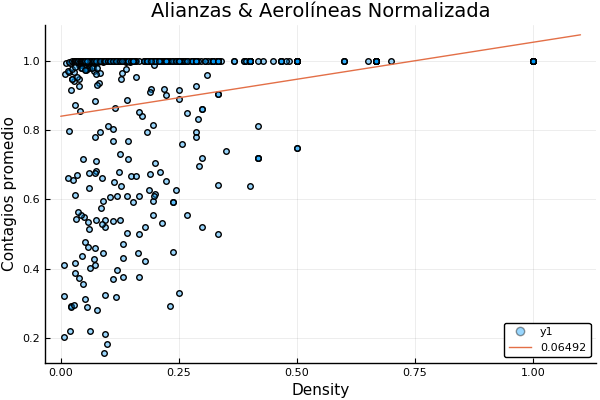

In [88]:
# Densidad vs. Cobertura Normalizada. Alianzas & Aerolíneas

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end

equation(x) = coef_r[2]*x + coef_r[1]

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true,
    label = "$r_2")


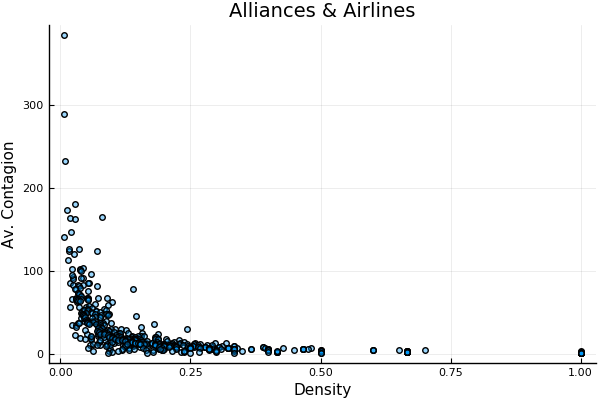

In [89]:
# Densidad vs. Cobertura No Normalizada. Alianzas & Aerolíneas

w = tabla_info_net[:, 4] #Densidad
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


plot_densidad_aa = scatter(x, y,
    #color = "#0f87bf",
    title = "Alliances & Airlines",
    xlabel = "Density",
    ylabel = "Av. Contagion",
    legend = false,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:1.1, 
#    legend = true)


In [90]:
#Ajuste lineal

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   43.1242    2.0289  21.2549   <1e-71
x1           -69.3852   5.95214 -11.6572   <1e-27


In [91]:
coef_r = round.(coef(cov), digits=6)

2-element Array{Float64,1}:
  43.124229
 -69.385193

In [92]:
round.(r2(cov), digits=5)

0.20655

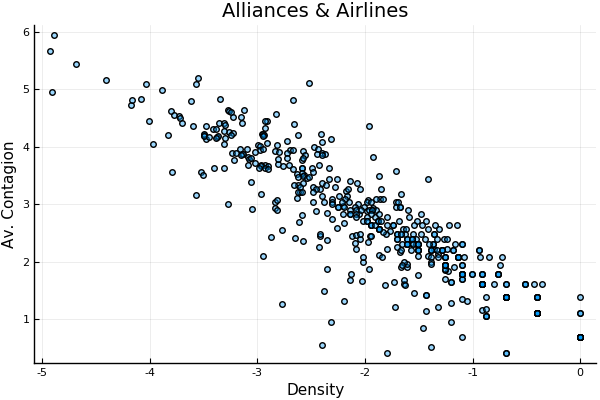

In [94]:
# Densidad vs. Cobertura No Normalizada. Alianzas & Aerolíneas

w = tabla_info_net[:, 4] #Densidad
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end

equation(x) = coef_r[2]*x + coef_r[1]

plot_densidad_aa = scatter(x, y,
    #color = "#0f87bf",
    title = "Alliances & Airlines",
    xlabel = "Density",
    ylabel = "Av. Contagion",
    legend = false,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -5:0.01:1.1, 
#    legend = true)

# Ahora voy a graficar lo anterior en escala log-log

In [64]:
y

524-element Array{Float64,1}:
 384.3474197002141 
 288.5836444444444 
 141.49216332378222
  57.15899613899614
 232.8619834710744 
  67.1714347826087 
 180.85765625      
 126.26984042553191
 120.54739130434781
 164.74267045454545
 174.08885714285708
 113.85226744186045
 164.4432352941176 
   ⋮               
   2.0             
   2.0             
   1.5             
   2.0             
   2.0             
   2.0             
   2.0             
   2.0             
   2.0             
   2.0             
   2.0             
   2.0             

In [48]:
xx = []
yy = []

for i in 1:length(x)
    xx = push!(xx, log(x[i]))
    yy = push!(yy, log(y[i]))
end
xx
yy

524-element Array{Any,1}:
 5.951546882360908 
 5.664984972677177 
 4.9522443326788075
 4.04583679060857  
 5.450445932442019 
 4.207248079518242 
 5.197710292309866 
 4.8384212076938065
 4.79204296444569  
 5.104384683497936 
 5.159565842100139 
 4.734901708357632 
 5.102565436453732 
 ⋮                 
 0.6931471805599453
 0.6931471805599453
 0.4054651081081644
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453
 0.6931471805599453

In [95]:

#x = densidad_nuevo[2:end] #desde alianzas
#yy = tabla_info_net[:, 8] #Coberturas
#y = yy[3:end] #desde alianzas


equation(x) =  -1.00516*x + 0.745155 #

#equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    xscale =(:log10),
    yscale =(:log10),
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 10e-3:0.01:0.999, 
#    legend = true)



DomainError: DomainError with -4.924535839393676:
NaN result for non-NaN input.

In [120]:
#Ajuste lineal

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   43.1242    2.0289  21.2549   <1e-71
x1           -69.3852   5.95214 -11.6572   <1e-27


In [121]:
coef_r = round.(coef(cov), digits=6)

2-element Array{Float64,1}:
  43.124229
 -69.385193

In [122]:
round.(r2(cov), digits=5)

0.20655

In [3]:
1e-3

0.001

In [ ]:

x = densidad_nuevo[2:end] #desde alianzas
yy = tabla_info_net[:, 8] #Coberturas
y = yy[3:end] #desde alianzas


equation(x) = coef_r[2]*x + coef_r[1] #

#equation(x) = -0.850142*x + 1.38602 #

#scatter(x, y,
#    #color = "#0f87bf",
#    title = "Alianzas & Aerolíneas Log-Log",
#    xlabel = "Betweenness prom.",
#    ylabel = "Contagios promedio",
#    legend = true,
#    xscale =(:log10),
#    yscale =(:log10),
#    #size = (500,500),
#    #aspect_ratio= 1,
#    alpha = 0.4)
plot(equation, 10e-3:10e-10:10e0, 
    legend = true)



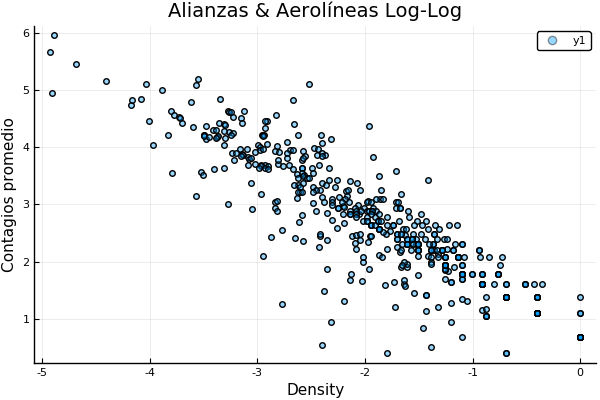

In [66]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00516*x + 0.745155 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -5:0.01:0, 
 #   legend = true)


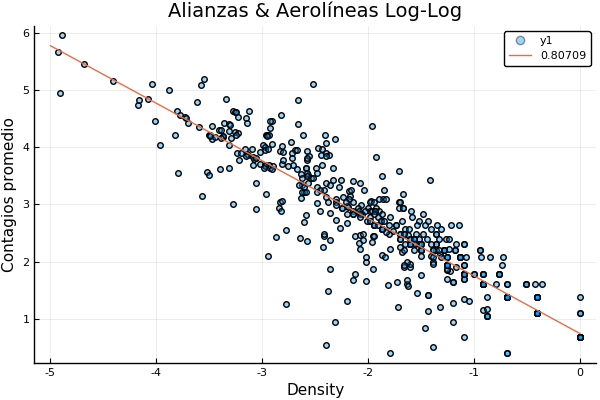

In [70]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00516*x + 0.745155 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Density",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:0, 
    legend = true,
    label = "0.80709")


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [97]:
reg_d_aer = regresion_lineal("Aerolíneas", "Density")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.846279 0.0119251 70.9662   <1e-99
x1            0.20109 0.0348841 5.76452    <1e-7


In [98]:
coef_r = round.(coef(reg_d_aer), digits=6)

2-element Array{Float64,1}:
 0.846279
 0.20109 

In [99]:
r_2 = round.(r2(reg_d_aer), digits=5)

0.06017

### Gráfica de cobertura (Densidad vs. Cobertura. Aerolíneas)

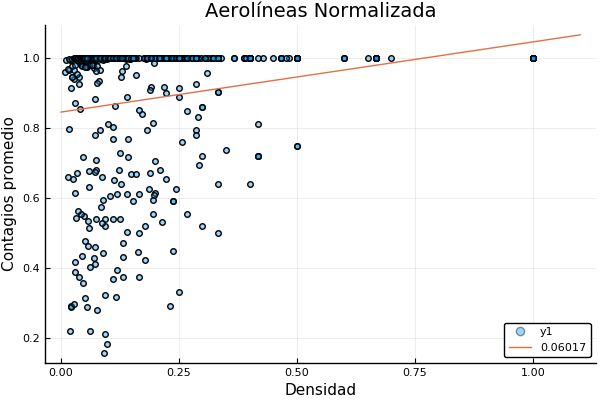

In [100]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.20109*x + 0.846279 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:1.1, 
    legend = true,
    label = "0.06017")


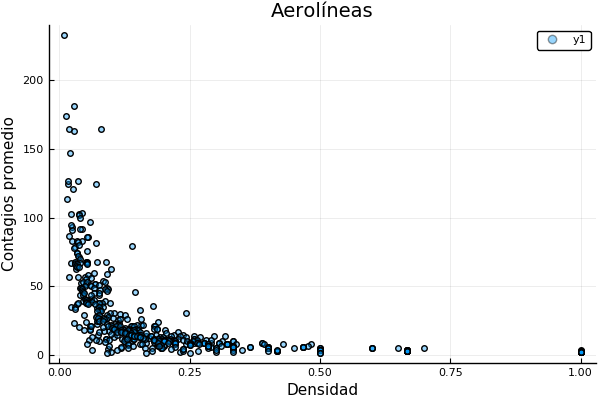

In [101]:

w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -64.225*x + 40.670 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:1.1, 
 #   legend = true)


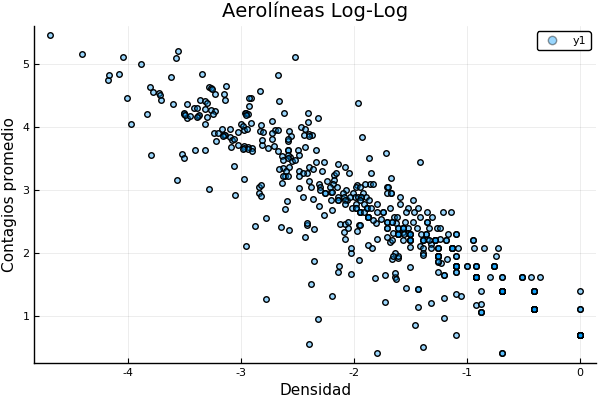

In [102]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00804*x + 0.740709 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Log-Log",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -5:0.01:0, 
 #   legend = true)


In [103]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.740709 0.0464664  15.9407   <1e-46
x1           -1.00804  0.022106 -45.6002   <1e-99


In [104]:
round.(r2(cov), digits=5)

0.80026

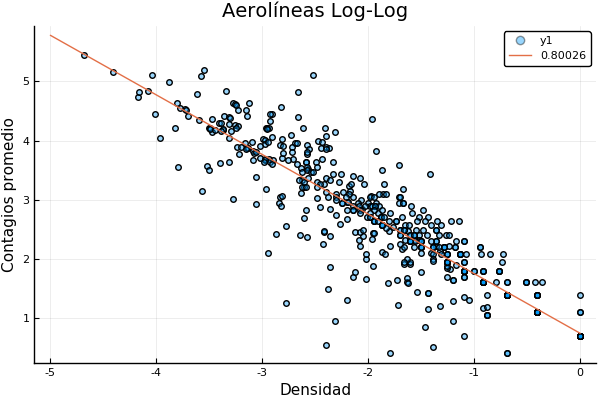

In [105]:
w = tabla_info_net[:, 4] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end
return x,y

equation(x) = -1.00804*x + 0.740709 #Cambiar

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Log-Log",
    xlabel = "Densidad",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:0, 
    legend = true,
    label = "0.80026")


## Análisis de coberturas (Todo)

### Encontramos la regresión

In [66]:
reg_ab_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.860144  0.011049 77.8478   <1e-99
x1           0.0676561 0.0147006 4.60227    <1e-5


In [67]:
coef_r = round.(coef(reg_ab_aa), digits=6)

2-element Array{Float64,1}:
 0.860144
 0.067656

In [68]:
r_2 = round.(r2(reg_ab_aa), digits=5)

0.03899

### Gráfica de cobertura (Betweenness vs. Cobertura. Alianzas & Aerolíneas)

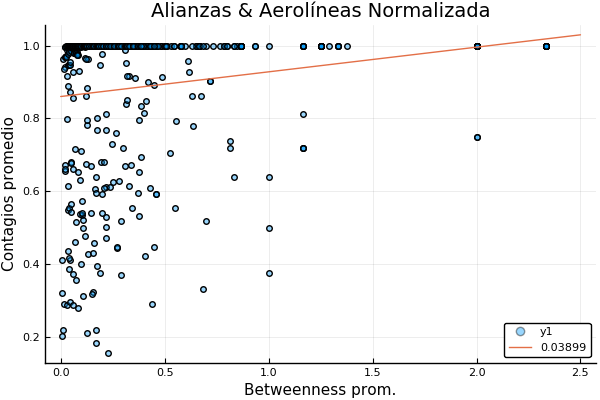

In [69]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0676561*x + 0.860144 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:2.5, 
    legend = true,
    label = "$r_2")


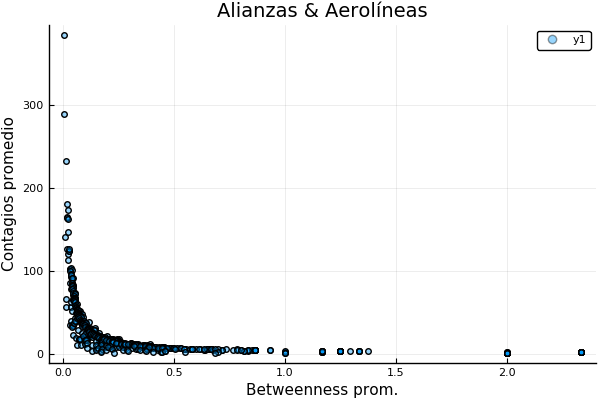

In [70]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:2.5, 
 #   legend = true)


In [156]:
 0.00001

1.0e-5

In [157]:
betweenness_datos = w[2:end]
#@show betweenness_datos
betweenness_nuevo = []
for i in 1:length(betweenness_datos)
    @show betweenness_datos[i]
    bn = betweenness_datos[i] + 1.0e-25
    @show bn
    betweenness_nuevo = push!(betweenness_nuevo, bn)
end
betweenness_nuevo

betweenness_datos[i] = 0.0016388726164783274
bn = 0.0016388726164783274
betweenness_datos[i] = 0.004474792240078254
bn = 0.004474792240078254
betweenness_datos[i] = 0.004819743898675947
bn = 0.004819743898675947
betweenness_datos[i] = 0.006119872899938487
bn = 0.006119872899938487
betweenness_datos[i] = 0.01346844342953292
bn = 0.01346844342953292
betweenness_datos[i] = 0.013208566235725793
bn = 0.013208566235725793
betweenness_datos[i] = 0.014520233562832463
bn = 0.014520233562832463
betweenness_datos[i] = 0.019180989942132822
bn = 0.019180989942132822
betweenness_datos[i] = 0.018714589473400888
bn = 0.018714589473400888
betweenness_datos[i] = 0.019758647743323438
bn = 0.019758647743323438
betweenness_datos[i] = 0.018216151664427527
bn = 0.018216151664427527
betweenness_datos[i] = 0.02178346004536956
bn = 0.02178346004536956
betweenness_datos[i] = 0.01964164286685706
bn = 0.01964164286685706
betweenness_datos[i] = 0.01878863971624152
bn = 0.01878863971624152
betweenness_datos[i] = 0.0

betweenness_datos[i] = 0.11875000000000006
bn = 0.11875000000000006
betweenness_datos[i] = 0.16243279569892471
bn = 0.16243279569892471
betweenness_datos[i] = 0.09764784946236567
bn = 0.09764784946236567
betweenness_datos[i] = 0.1242607526881721
bn = 0.1242607526881721
betweenness_datos[i] = 0.11243279569892481
bn = 0.11243279569892481
betweenness_datos[i] = 0.127486559139785
bn = 0.127486559139785
betweenness_datos[i] = 0.1418682795698925
bn = 0.1418682795698925
betweenness_datos[i] = 0.10515387467556545
bn = 0.10515387467556545
betweenness_datos[i] = 0.1170559881349648
bn = 0.1170559881349648
betweenness_datos[i] = 0.10033370411568412
bn = 0.10033370411568412
betweenness_datos[i] = 0.12165368928439009
bn = 0.12165368928439009
betweenness_datos[i] = 0.10337411939191699
bn = 0.10337411939191699
betweenness_datos[i] = 0.11133004926108375
bn = 0.11133004926108375
betweenness_datos[i] = 0.11038131727786897
bn = 0.11038131727786897
betweenness_datos[i] = 0.14203612479474548
bn = 0.14203612

betweenness_datos[i] = 0.31136363636363634
bn = 0.31136363636363634
betweenness_datos[i] = 0.39015151515151514
bn = 0.39015151515151514
betweenness_datos[i] = 0.29090909090909095
bn = 0.29090909090909095
betweenness_datos[i] = 0.37878787878787873
bn = 0.37878787878787873
betweenness_datos[i] = 0.3113636363636364
bn = 0.3113636363636364
betweenness_datos[i] = 0.35959595959595964
bn = 0.35959595959595964
betweenness_datos[i] = 0.36262626262626263
bn = 0.36262626262626263
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3131313131313132
bn = 0.3131313131313132
betweenness_datos[i] = 0.3424242424242424
bn = 0.3424242424242424
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3212121212121212
bn = 0.3212121212121212
betweenness_datos[i] = 0.3838383838383839
bn = 0.3838383838383839
betweenness_datos[i] = 0.3181818181818183
bn = 0.3181818181818183
betweenness_datos[i] = 0.33535353535353535
bn = 0.33535353535353

bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.3333333333333333
bn = 1.3333333333333333
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.0
bn = 1.0
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.2916666666666665
bn = 1.2916666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.3749999999999998
bn = 1.3749999999999998
betweenness_datos[i] = 2.3333333333333335
bn = 2.3333333333333335


525-element Array{Any,1}:
 0.0016388726164783274
 0.004474792240078254 
 0.004819743898675947 
 0.006119872899938487 
 0.01346844342953292  
 0.013208566235725793 
 0.014520233562832463 
 0.019180989942132822 
 0.018714589473400888 
 0.019758647743323438 
 0.018216151664427527 
 0.02178346004536956  
 0.01964164286685706  
 ⋮                    
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  

In [71]:

#w = tabla_info_net[:, 6] #betweenness
yy = tabla_info_net[:, 8] #Coberturas
y = yy[3:end]
#x = Array{Float64}(undef, 0)
x = betweenness_nuevo[2:end]
#@show betweenness_nuevo
#y = Array{Float64}(undef, 0)
#for i in 3:length(lista_aerolineas)
    #x = push!(x, w[i])
    #y = push!(y, log(c[i]))
#end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    xscale =(:log10),
    yscale =(:log10),
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -6:0.1:1, 
 #   legend = true)


UndefVarError: UndefVarError: betweenness_nuevo not defined

In [161]:
10e-1

1.0

In [111]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38602 0.0244525  56.6819   <1e-99
x1           -0.850142  0.012692 -66.9823   <1e-99


In [ ]:
coef_r = round.(coef(cov), digits=6)

In [114]:
r_2 = round.(r2(cov), digits=5)

0.89578

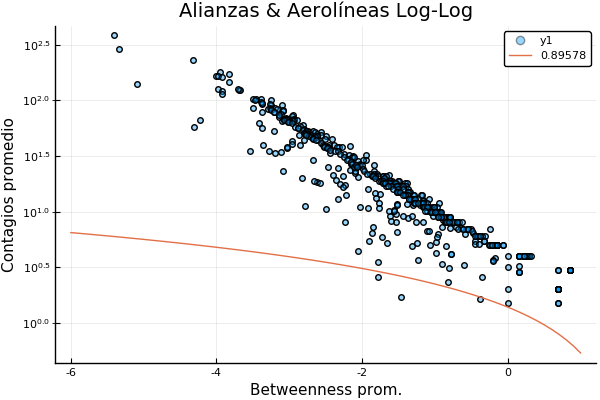

In [162]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, c[i])
end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    #xscale=(:log10),
    ylabel = "Contagios promedio",
    yscale=(:log10),
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -6:0.1:1, 
    legend = true,
    label = "$r_2")


In [125]:
log10(1)

0.0

## Análisis de coberturas para Grado prom.

### Encontramos la regresión lineal (Global y Alianzas)

In [81]:
reg_ad_ga = regresion_lineal("Global y Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)    0.386838  0.230743   1.67649   0.2356
x1           -0.0147882 0.0301533 -0.490433   0.6724


In [ ]:
coef_r = round.(coef(reg_ad_ga), digits=6)

In [82]:
r_2 = round.(r2(reg_ad_ga), digits=5)

0.10735

### Gráfica de cobertura (Grado vs. Cobertura. Global & Alianzas)

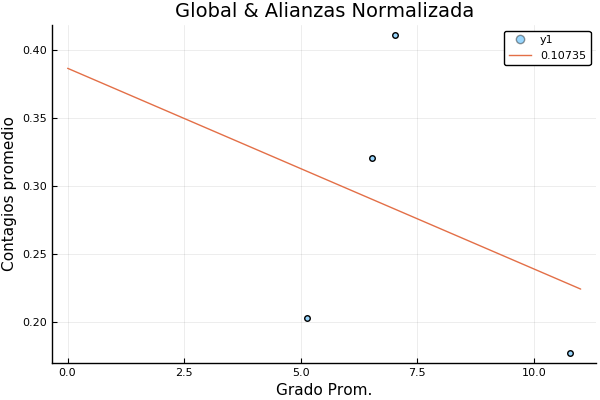

In [83]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -0.0147882*x + 0.386838  #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Grado Prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:11, 
    legend = true,
    label = "$r_2")


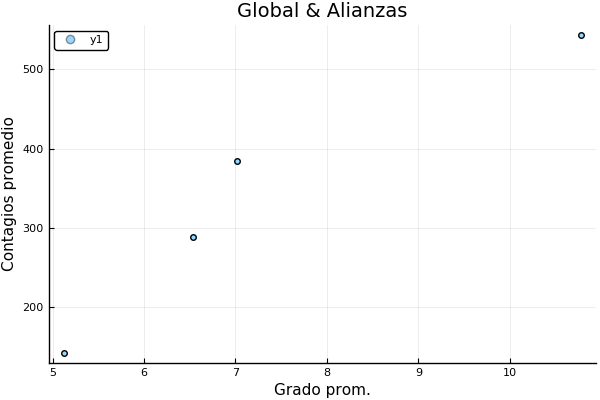

In [84]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

#equation(x) = 66.8273*x - 151.617  #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:11, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [85]:
reg_ad_al = regresion_lineal("Alianzas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -0.339536  0.132866 -2.55547   0.2375
x1            0.104599 0.0211686  4.94126   0.1271


In [ ]:
coef_r = round.(coef(reg_ad_al), digits=6)

In [86]:
r_2 = round.(r2(reg_ad_al), digits=5)

0.96065

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas)

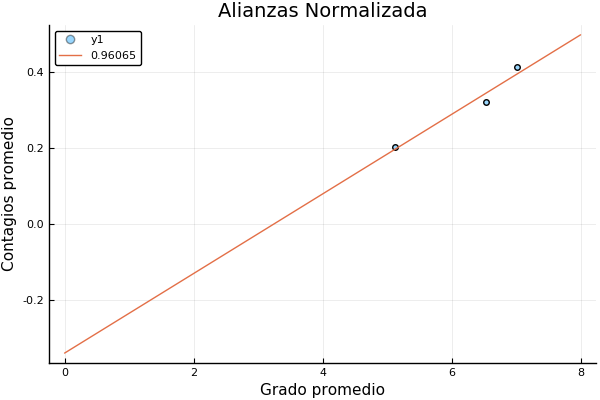

In [87]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 0.104599*x - 0.339536 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Grado promedio",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:8, 
    legend = true,
    label = "$r_2")


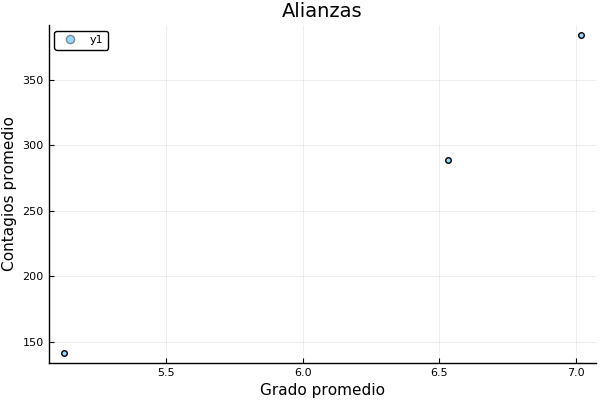

In [88]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 123.09*x - 493.93 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Grado promedio",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:8, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [89]:
reg_ad_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
                 Estimate  Std.Error   t value Pr(>|t|)
(Intercept)      0.894211  0.0189048   47.3008   <1e-99
x1           -0.000971664 0.00694833 -0.139841   0.8888


In [ ]:
coef_r = round.(coef(reg_ad_aa), digits=6)

In [90]:
r_2 = round.(r2(reg_ad_aa), digits=5)

4.0e-5

### Gráfica de cobertura (Grado vs. Cobertura. Alianzas & Aerolíneas)

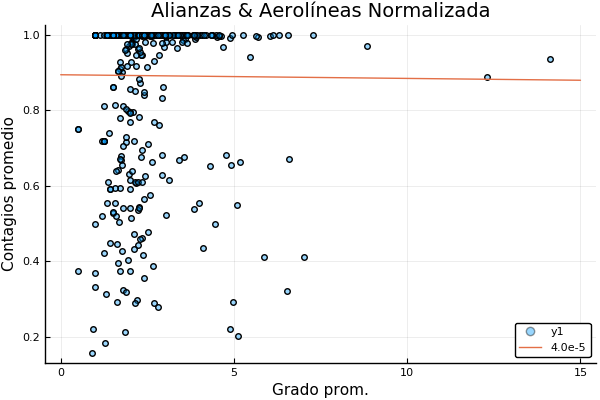

In [91]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.000971664*x + 0.894211 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:15, 
    legend = true,
    label = "$r_2")


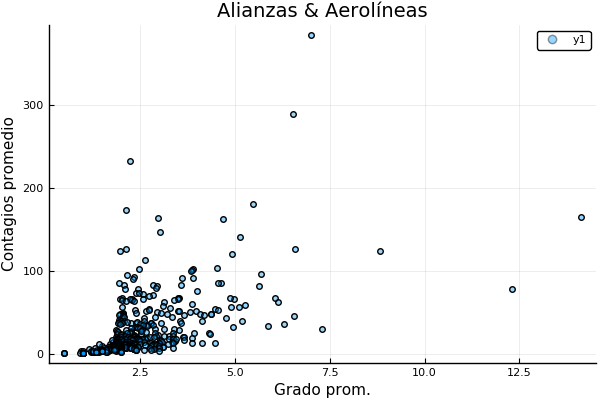

In [92]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 16.721*x - 13.7978 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:15, 
 #   legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [93]:
reg_ad_aer = regresion_lineal("Aerolíneas", "Av. Degree")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
               Estimate  Std.Error t value Pr(>|t|)
(Intercept)    0.878239   0.018759 46.8169   <1e-99
x1           0.00711574 0.00698219 1.01913   0.3086


In [ ]:
coef_r = round.(coef(reg_ad_aer), digits=6)

In [94]:
r_2 = round.(r2(reg_ad_aer), digits=5)

0.002

### Gráfica de cobertura (Grado vs. Cobertura. Aerolíneas)

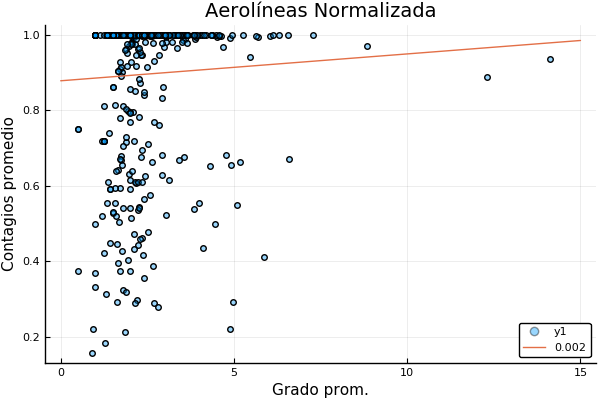

In [95]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.00711574*x + 0.878239 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:15, 
    legend = true,
    label = "$r_2")


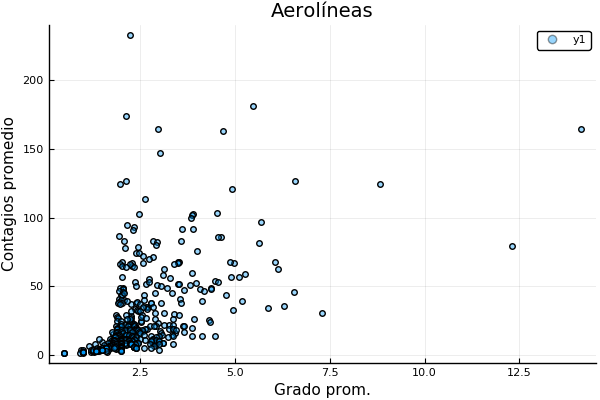

In [96]:

w = tabla_info_net[:, 5] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 13.8297*x - 7.94881 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Grado prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:15, 
 #   legend = true)


## Análisis de coberturas para Betweenness

### Encontramos la regresión lineal (Global y Alianzas)

In [97]:
reg_ab_ga = regresion_lineal("Global y Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.207269   0.17823  1.16293   0.3649
x1            16.5828   39.0344 0.424826   0.7123


In [ ]:
coef_r = round.(coef(reg_ab_ga), digits=6)

In [98]:
r_2 = round.(r2(reg_ab_ga), digits=5)

0.08277

### Gráfica de cobertura (Betweenness vs. Cobertura. Global & Alianzas)

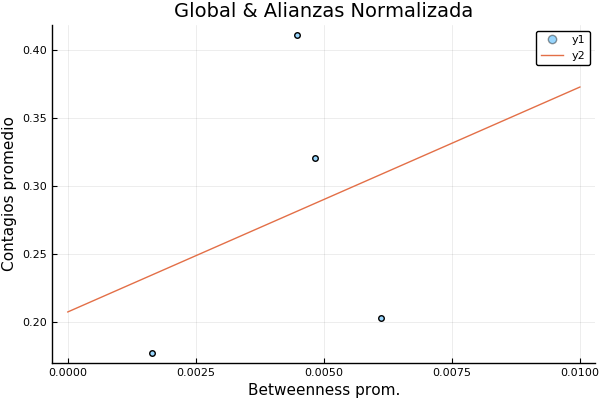

In [99]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 16.5828*x + 0.207269 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:0.01, 
    legend = true)


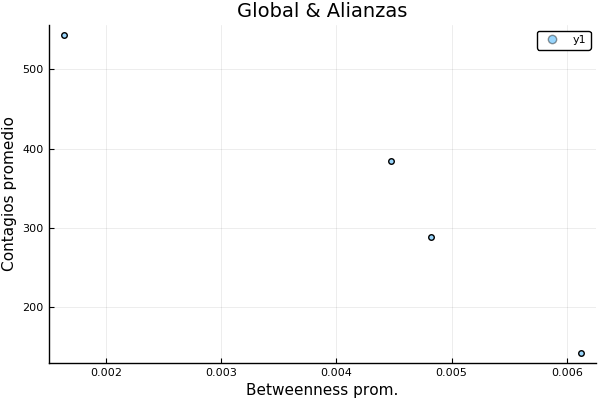

In [100]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -86244.9*x + 708.06 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.01, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [101]:
reg_ab_al = regresion_lineal("Alianzas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  0.912596  0.154074   5.9231   0.1065
x1           -116.963   29.7054 -3.93744   0.1583


In [ ]:
coef_r = round.(coef(reg_ab_al), digits=6)

In [102]:
r_2 = round.(r2(reg_ab_al), digits=5)

0.93941

### Gráfica de cobertura (Av. Betweenness vs. Cobertura. Alianzas)

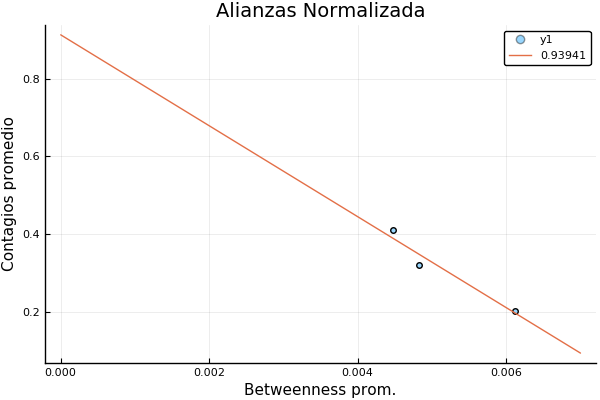

In [103]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = -116.963*x + 0.912596 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.0075, 
    legend = true,
    label = "$r_2")


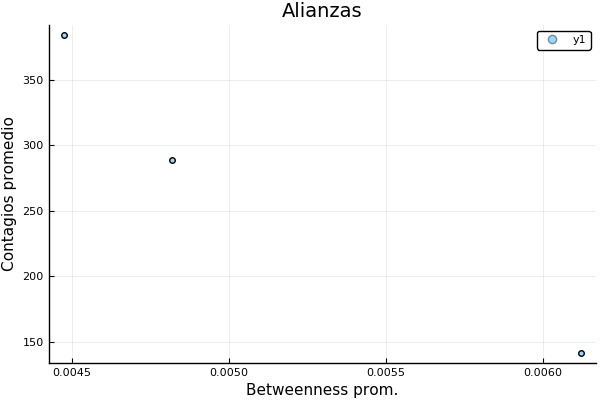

In [104]:
w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = -1.37974e5*x + 981.267 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.001:0.01, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [105]:
reg_ab_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.860144  0.011049 77.8478   <1e-99
x1           0.0676561 0.0147006 4.60227    <1e-5


In [ ]:
coef_r = round.(coef(reg_ab_aa), digits=6)

In [106]:
r_2 = round.(r2(reg_ab_aa), digits=5)

0.03899

### Gráfica de cobertura (Betweenness vs. Cobertura. Alianzas & Aerolíneas)

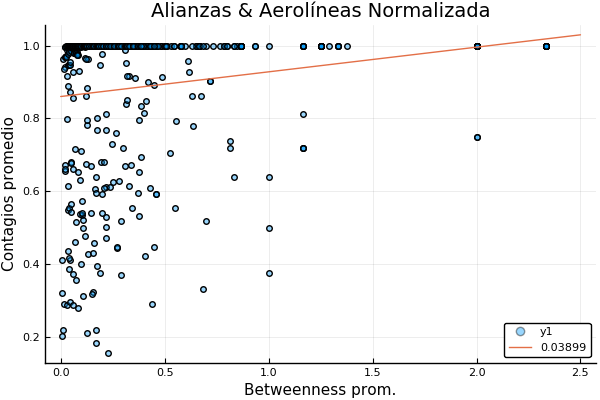

In [107]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0676561*x + 0.860144 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:2.5, 
    legend = true,
    label = "$r_2")


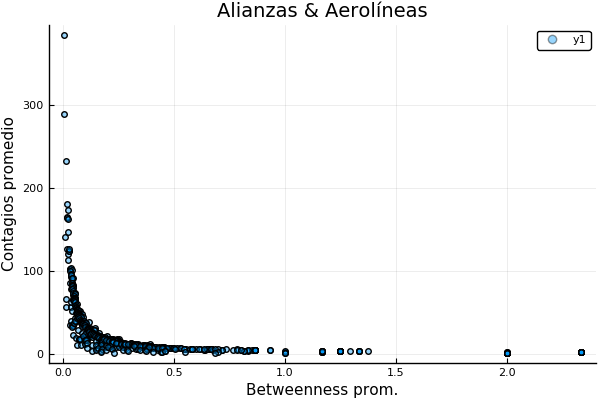

In [108]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:2.5, 
 #   legend = true)


In [156]:
 0.00001

1.0e-5

In [157]:
betweenness_datos = w[2:end]
#@show betweenness_datos
betweenness_nuevo = []
for i in 1:length(betweenness_datos)
    @show betweenness_datos[i]
    bn = betweenness_datos[i] + 1.0e-25
    @show bn
    betweenness_nuevo = push!(betweenness_nuevo, bn)
end
betweenness_nuevo

betweenness_datos[i] = 0.0016388726164783274
bn = 0.0016388726164783274
betweenness_datos[i] = 0.004474792240078254
bn = 0.004474792240078254
betweenness_datos[i] = 0.004819743898675947
bn = 0.004819743898675947
betweenness_datos[i] = 0.006119872899938487
bn = 0.006119872899938487
betweenness_datos[i] = 0.01346844342953292
bn = 0.01346844342953292
betweenness_datos[i] = 0.013208566235725793
bn = 0.013208566235725793
betweenness_datos[i] = 0.014520233562832463
bn = 0.014520233562832463
betweenness_datos[i] = 0.019180989942132822
bn = 0.019180989942132822
betweenness_datos[i] = 0.018714589473400888
bn = 0.018714589473400888
betweenness_datos[i] = 0.019758647743323438
bn = 0.019758647743323438
betweenness_datos[i] = 0.018216151664427527
bn = 0.018216151664427527
betweenness_datos[i] = 0.02178346004536956
bn = 0.02178346004536956
betweenness_datos[i] = 0.01964164286685706
bn = 0.01964164286685706
betweenness_datos[i] = 0.01878863971624152
bn = 0.01878863971624152
betweenness_datos[i] = 0.0

betweenness_datos[i] = 0.11875000000000006
bn = 0.11875000000000006
betweenness_datos[i] = 0.16243279569892471
bn = 0.16243279569892471
betweenness_datos[i] = 0.09764784946236567
bn = 0.09764784946236567
betweenness_datos[i] = 0.1242607526881721
bn = 0.1242607526881721
betweenness_datos[i] = 0.11243279569892481
bn = 0.11243279569892481
betweenness_datos[i] = 0.127486559139785
bn = 0.127486559139785
betweenness_datos[i] = 0.1418682795698925
bn = 0.1418682795698925
betweenness_datos[i] = 0.10515387467556545
bn = 0.10515387467556545
betweenness_datos[i] = 0.1170559881349648
bn = 0.1170559881349648
betweenness_datos[i] = 0.10033370411568412
bn = 0.10033370411568412
betweenness_datos[i] = 0.12165368928439009
bn = 0.12165368928439009
betweenness_datos[i] = 0.10337411939191699
bn = 0.10337411939191699
betweenness_datos[i] = 0.11133004926108375
bn = 0.11133004926108375
betweenness_datos[i] = 0.11038131727786897
bn = 0.11038131727786897
betweenness_datos[i] = 0.14203612479474548
bn = 0.14203612

betweenness_datos[i] = 0.31136363636363634
bn = 0.31136363636363634
betweenness_datos[i] = 0.39015151515151514
bn = 0.39015151515151514
betweenness_datos[i] = 0.29090909090909095
bn = 0.29090909090909095
betweenness_datos[i] = 0.37878787878787873
bn = 0.37878787878787873
betweenness_datos[i] = 0.3113636363636364
bn = 0.3113636363636364
betweenness_datos[i] = 0.35959595959595964
bn = 0.35959595959595964
betweenness_datos[i] = 0.36262626262626263
bn = 0.36262626262626263
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3131313131313132
bn = 0.3131313131313132
betweenness_datos[i] = 0.3424242424242424
bn = 0.3424242424242424
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3212121212121212
bn = 0.3212121212121212
betweenness_datos[i] = 0.3838383838383839
bn = 0.3838383838383839
betweenness_datos[i] = 0.3181818181818183
bn = 0.3181818181818183
betweenness_datos[i] = 0.33535353535353535
bn = 0.33535353535353

bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.3333333333333333
bn = 1.3333333333333333
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.0
bn = 1.0
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.2916666666666665
bn = 1.2916666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.3749999999999998
bn = 1.3749999999999998
betweenness_datos[i] = 2.3333333333333335
bn = 2.3333333333333335


525-element Array{Any,1}:
 0.0016388726164783274
 0.004474792240078254 
 0.004819743898675947 
 0.006119872899938487 
 0.01346844342953292  
 0.013208566235725793 
 0.014520233562832463 
 0.019180989942132822 
 0.018714589473400888 
 0.019758647743323438 
 0.018216151664427527 
 0.02178346004536956  
 0.01964164286685706  
 ⋮                    
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  

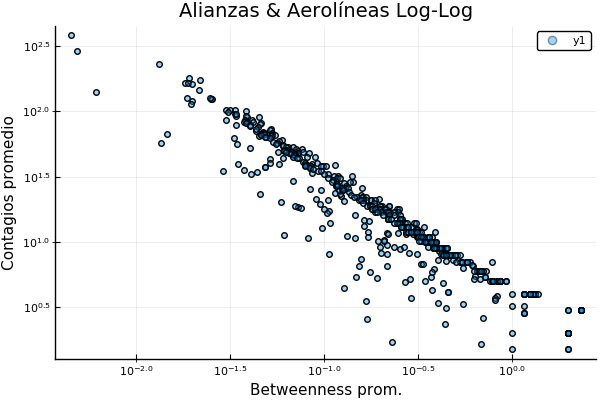

In [158]:

#w = tabla_info_net[:, 6] #betweenness
yy = tabla_info_net[:, 8] #Coberturas
y = yy[3:end]
#x = Array{Float64}(undef, 0)
x = betweenness_nuevo[2:end]
#@show betweenness_nuevo
#y = Array{Float64}(undef, 0)
#for i in 3:length(lista_aerolineas)
    #x = push!(x, w[i])
    #y = push!(y, log(c[i]))
#end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    xscale =(:log10),
    yscale =(:log10),
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -6:0.1:1, 
 #   legend = true)


In [161]:
10e-1

1.0

In [111]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38602 0.0244525  56.6819   <1e-99
x1           -0.850142  0.012692 -66.9823   <1e-99


In [ ]:
coef_r = round.(coef(cov), digits=6)

In [114]:
r_2 = round.(r2(cov), digits=5)

0.89578

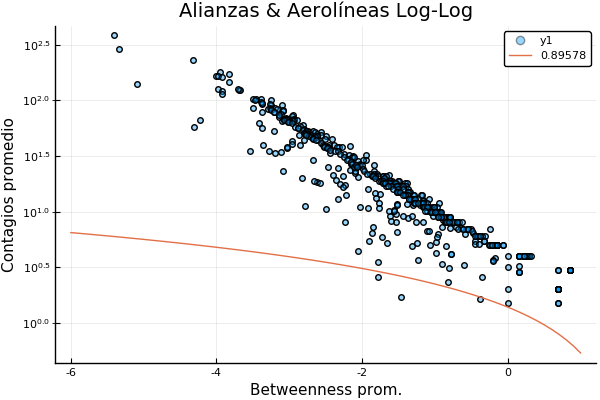

In [162]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, c[i])
end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    #xscale=(:log10),
    ylabel = "Contagios promedio",
    yscale=(:log10),
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -6:0.1:1, 
    legend = true,
    label = "$r_2")


In [125]:
log10(1)

0.0

## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [92]:
reg_ab_aer = regresion_lineal("Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.865315 0.0108748 79.5706   <1e-99
x1           0.0633927 0.0144273 4.39394    <1e-4


In [ ]:
coef_r = round.(coef(reg_ab_aer), digits=6)

In [93]:
r_2 = round.(r2(reg_ab_aer), digits=5)

0.03587

### Gráfica de cobertura (Betweenness vs. Cobertura. Aerolíneas)

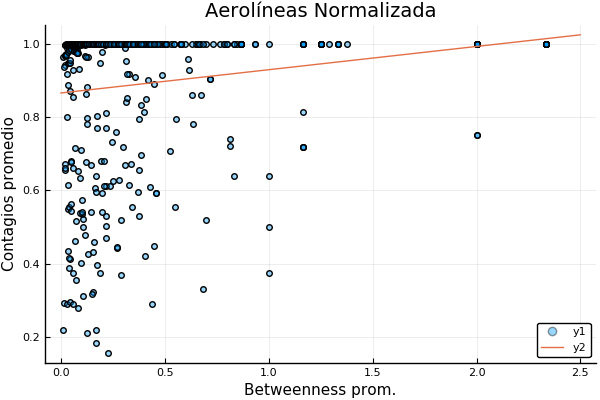

In [245]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0633927*x + 0.865315 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.01:2.5, 
    legend = true)


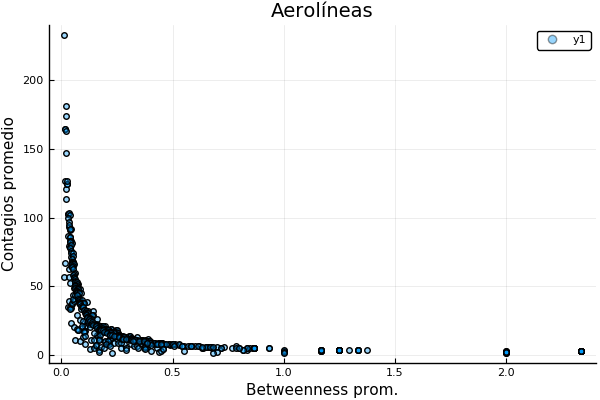

In [246]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -24.0899*x + 36.4025 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:2.5, 
 #   legend = true)


In [209]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38074 0.0246092  56.1066   <1e-99
x1           -0.855204 0.0130199 -65.6843   <1e-99


In [ ]:
coef_r = round.(coef(cov), digits=6)

In [210]:
round.(r2(cov), digits=5)

0.89262

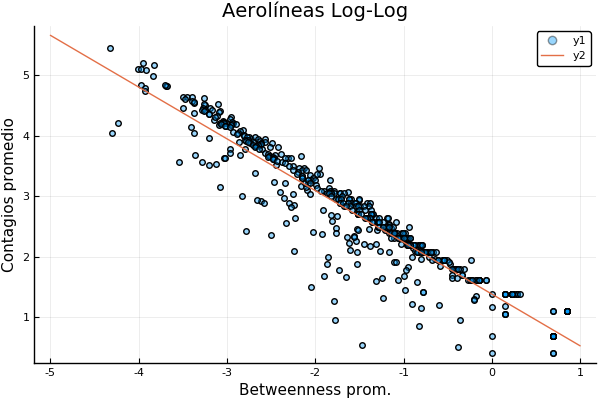

In [247]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, log(c[i]))
end


equation(x) = -0.855204*x + 1.38074 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -5:0.01:1, 
    legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [105]:
reg_ab_aa = regresion_lineal("Alianzas y Aerolíneas", "Av. Betweenness")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)   0.860144  0.011049 77.8478   <1e-99
x1           0.0676561 0.0147006 4.60227    <1e-5


In [ ]:
coef_r = round.(coef(reg_ab_aa), digits=6)

In [106]:
r_2 = round.(r2(reg_ab_aa), digits=5)

0.03899

### Gráfica de cobertura (Betweenness vs. Cobertura. Alianzas & Aerolíneas)

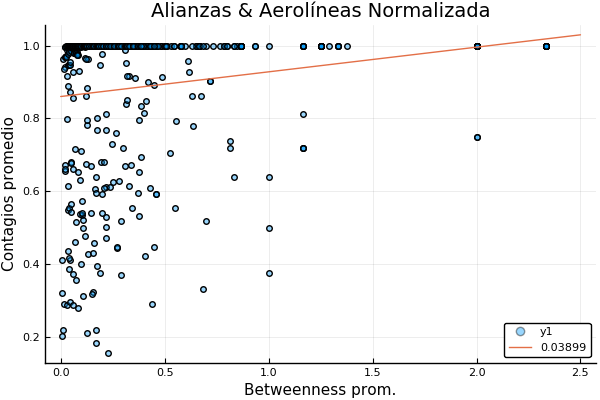

In [107]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = 0.0676561*x + 0.860144 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:2.5, 
    legend = true,
    label = "$r_2")


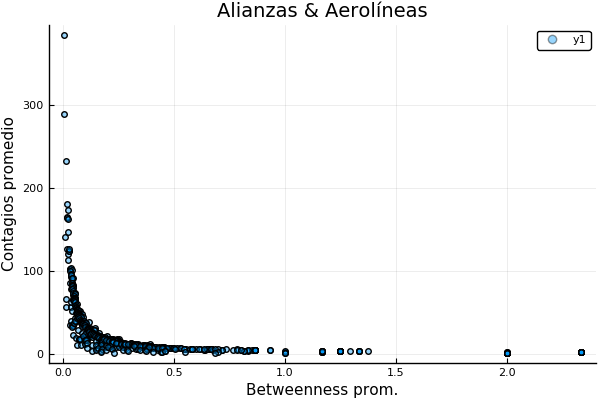

In [108]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


#equation(x) = -25.908*x + 38.6067 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:2.5, 
 #   legend = true)


In [156]:
 0.00001

1.0e-5

In [157]:
betweenness_datos = w[2:end]
#@show betweenness_datos
betweenness_nuevo = []
for i in 1:length(betweenness_datos)
    @show betweenness_datos[i]
    bn = betweenness_datos[i] + 1.0e-25
    @show bn
    betweenness_nuevo = push!(betweenness_nuevo, bn)
end
betweenness_nuevo

betweenness_datos[i] = 0.0016388726164783274
bn = 0.0016388726164783274
betweenness_datos[i] = 0.004474792240078254
bn = 0.004474792240078254
betweenness_datos[i] = 0.004819743898675947
bn = 0.004819743898675947
betweenness_datos[i] = 0.006119872899938487
bn = 0.006119872899938487
betweenness_datos[i] = 0.01346844342953292
bn = 0.01346844342953292
betweenness_datos[i] = 0.013208566235725793
bn = 0.013208566235725793
betweenness_datos[i] = 0.014520233562832463
bn = 0.014520233562832463
betweenness_datos[i] = 0.019180989942132822
bn = 0.019180989942132822
betweenness_datos[i] = 0.018714589473400888
bn = 0.018714589473400888
betweenness_datos[i] = 0.019758647743323438
bn = 0.019758647743323438
betweenness_datos[i] = 0.018216151664427527
bn = 0.018216151664427527
betweenness_datos[i] = 0.02178346004536956
bn = 0.02178346004536956
betweenness_datos[i] = 0.01964164286685706
bn = 0.01964164286685706
betweenness_datos[i] = 0.01878863971624152
bn = 0.01878863971624152
betweenness_datos[i] = 0.0

betweenness_datos[i] = 0.11875000000000006
bn = 0.11875000000000006
betweenness_datos[i] = 0.16243279569892471
bn = 0.16243279569892471
betweenness_datos[i] = 0.09764784946236567
bn = 0.09764784946236567
betweenness_datos[i] = 0.1242607526881721
bn = 0.1242607526881721
betweenness_datos[i] = 0.11243279569892481
bn = 0.11243279569892481
betweenness_datos[i] = 0.127486559139785
bn = 0.127486559139785
betweenness_datos[i] = 0.1418682795698925
bn = 0.1418682795698925
betweenness_datos[i] = 0.10515387467556545
bn = 0.10515387467556545
betweenness_datos[i] = 0.1170559881349648
bn = 0.1170559881349648
betweenness_datos[i] = 0.10033370411568412
bn = 0.10033370411568412
betweenness_datos[i] = 0.12165368928439009
bn = 0.12165368928439009
betweenness_datos[i] = 0.10337411939191699
bn = 0.10337411939191699
betweenness_datos[i] = 0.11133004926108375
bn = 0.11133004926108375
betweenness_datos[i] = 0.11038131727786897
bn = 0.11038131727786897
betweenness_datos[i] = 0.14203612479474548
bn = 0.14203612

betweenness_datos[i] = 0.31136363636363634
bn = 0.31136363636363634
betweenness_datos[i] = 0.39015151515151514
bn = 0.39015151515151514
betweenness_datos[i] = 0.29090909090909095
bn = 0.29090909090909095
betweenness_datos[i] = 0.37878787878787873
bn = 0.37878787878787873
betweenness_datos[i] = 0.3113636363636364
bn = 0.3113636363636364
betweenness_datos[i] = 0.35959595959595964
bn = 0.35959595959595964
betweenness_datos[i] = 0.36262626262626263
bn = 0.36262626262626263
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3131313131313132
bn = 0.3131313131313132
betweenness_datos[i] = 0.3424242424242424
bn = 0.3424242424242424
betweenness_datos[i] = 0.3252525252525253
bn = 0.3252525252525253
betweenness_datos[i] = 0.3212121212121212
bn = 0.3212121212121212
betweenness_datos[i] = 0.3838383838383839
bn = 0.3838383838383839
betweenness_datos[i] = 0.3181818181818183
bn = 0.3181818181818183
betweenness_datos[i] = 0.33535353535353535
bn = 0.33535353535353

bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.3333333333333333
bn = 1.3333333333333333
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.0
bn = 1.0
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.2916666666666665
bn = 1.2916666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.1666666666666665
bn = 1.1666666666666665
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.25
bn = 1.25
betweenness_datos[i] = 1.3749999999999998
bn = 1.3749999999999998
betweenness_datos[i] = 2.3333333333333335
bn = 2.3333333333333335


525-element Array{Any,1}:
 0.0016388726164783274
 0.004474792240078254 
 0.004819743898675947 
 0.006119872899938487 
 0.01346844342953292  
 0.013208566235725793 
 0.014520233562832463 
 0.019180989942132822 
 0.018714589473400888 
 0.019758647743323438 
 0.018216151664427527 
 0.02178346004536956  
 0.01964164286685706  
 ⋮                    
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  
 2.0                  

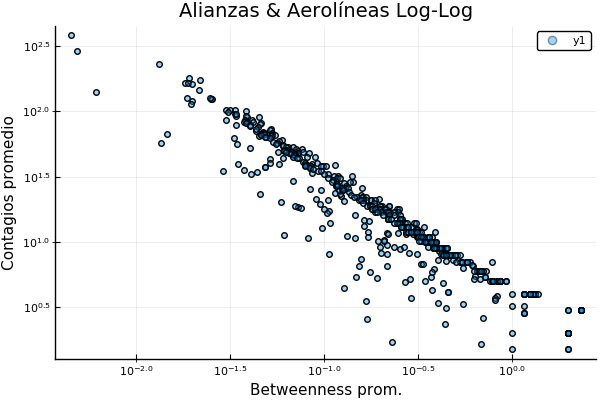

In [158]:

#w = tabla_info_net[:, 6] #betweenness
yy = tabla_info_net[:, 8] #Coberturas
y = yy[3:end]
#x = Array{Float64}(undef, 0)
x = betweenness_nuevo[2:end]
#@show betweenness_nuevo
#y = Array{Float64}(undef, 0)
#for i in 3:length(lista_aerolineas)
    #x = push!(x, w[i])
    #y = push!(y, log(c[i]))
#end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    ylabel = "Contagios promedio",
    legend = true,
    xscale =(:log10),
    yscale =(:log10),
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, -6:0.1:1, 
 #   legend = true)


In [161]:
10e-1

1.0

In [111]:
#log recta

    df_cov = hcat(x, y)
    df_cov = convert(DataFrame, df_cov)
    
    cov = lm(@formula(x2 ~ x1), df_cov)
    

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    1.38602 0.0244525  56.6819   <1e-99
x1           -0.850142  0.012692 -66.9823   <1e-99


In [ ]:
coef_r = round.(coef(cov), digits=6)

In [114]:
r_2 = round.(r2(cov), digits=5)

0.89578

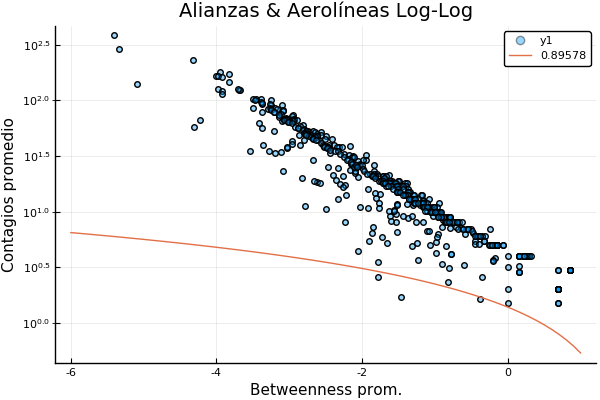

In [162]:

w = tabla_info_net[:, 6] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, log(w[i]))
    y = push!(y, c[i])
end


equation(x) = -0.850142*x + 1.38602 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Log-Log",
    xlabel = "Betweenness prom.",
    #xscale=(:log10),
    ylabel = "Contagios promedio",
    yscale=(:log10),
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, -6:0.1:1, 
    legend = true,
    label = "$r_2")


In [125]:
log10(1)

0.0

## Análisis de coberturas para Global Clustering Coefficient

### Encontramos la regresión lineal (Global y Alianzas)

In [96]:
reg_gcc_ga = regresion_lineal("Global y Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
             Estimate Std.Error   t value Pr(>|t|)
(Intercept)   0.36326  0.215056   1.68914   0.2333
x1           -2.04863    4.9319 -0.415383   0.7182


In [ ]:
coef_r = round.(coef(reg_gcc_ga), digits=6)

In [97]:
r_2 = round.(r2(reg_gcc_ga), digits=5)

0.07942

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Global & Alianzas)

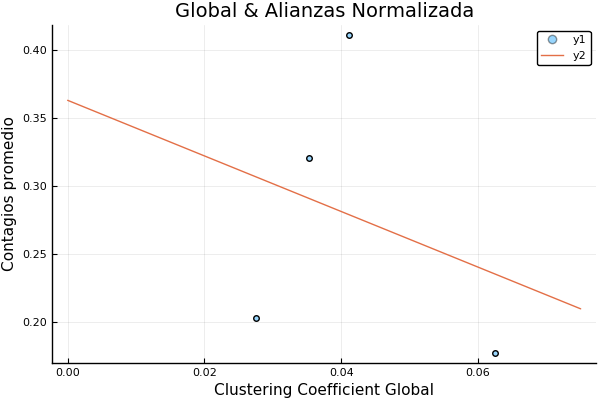

In [248]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = -2.04863*x + 0.36326 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.001:0.075, 
    legend = true)


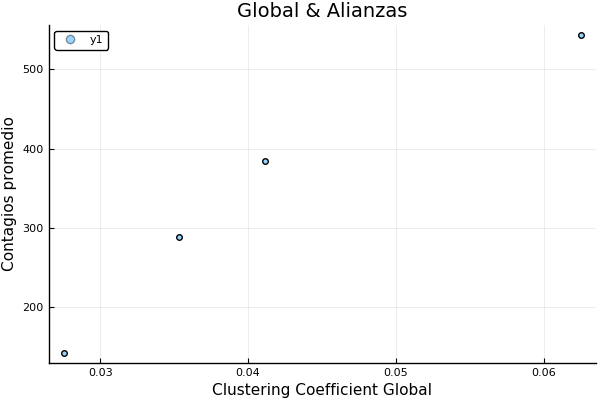

In [249]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[2], w[3], w[4], w[5]]
y = [c[2], c[3], c[4], c[5]]

equation(x) = 10916.4*x - 114.121 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Global & Alianzas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.01:0.1, 
 #   legend = true)


## Análisis de coberturas (Alianzas)

### Encontramos la regresión

In [101]:
reg_gcc_al = regresion_lineal("Alianzas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -0.220655 0.00440849 -50.0522   0.0127
x1             15.3446   0.125481  122.286   0.0052


In [ ]:
coef_r = round.(coef(reg_gcc_al), digits=6)

In [102]:
r_2 = round.(r2(reg_gcc_al), digits=5)

0.99993

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas)

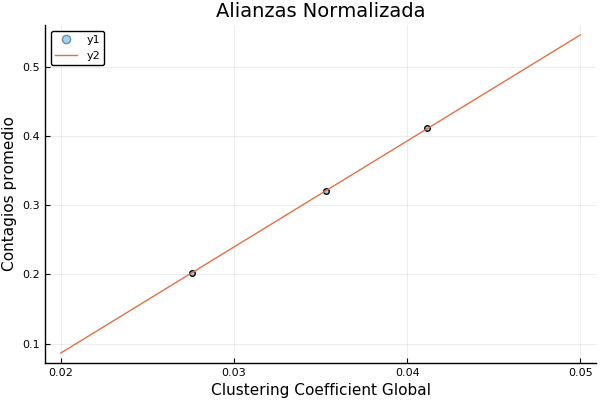

In [250]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 15.3446*x - 0.220655 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0.02:0.01:0.05, 
    legend = true)


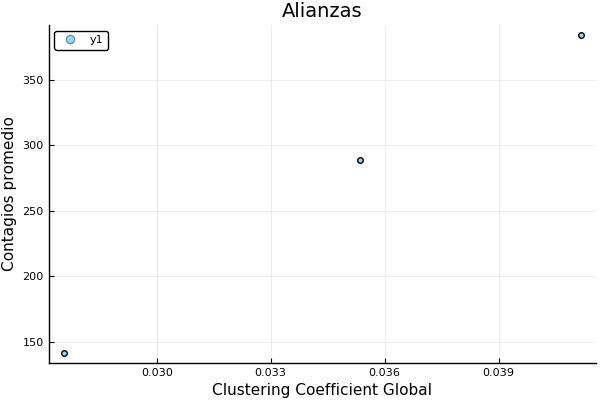

In [251]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = [w[3], w[4], w[5]]
y = [c[3], c[4], c[5]]

equation(x) = 17892.4*x - 348.316 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0.02:0.01:0.05, 
 #   legend = true)


## Análisis de coberturas (Alianzas & Aerolíneas)

### Encontramos la regresión

In [105]:
reg_gcc_aa = regresion_lineal("Alianzas y Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)   0.896166 0.00933181  96.0335   <1e-99
x1           -0.151228   0.110147 -1.37297   0.1704


In [ ]:
coef_r = round.(coef(reg_gcc_aa), digits=6)

In [106]:
r_2 = round.(r2(reg_gcc_aa), digits=5)

0.0036

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Alianzas & Aerolíneas)

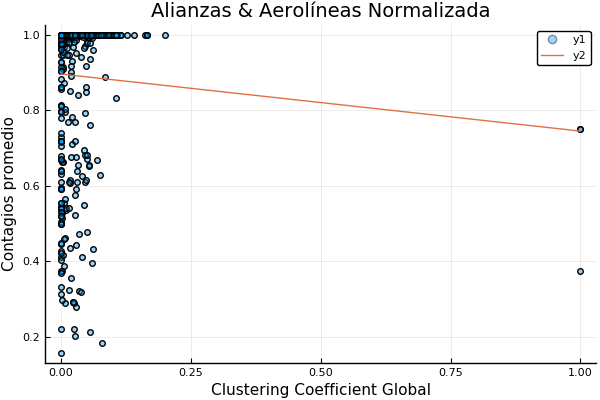

In [252]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.151228*x + 0.896166 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:1:1, 
    legend = true)


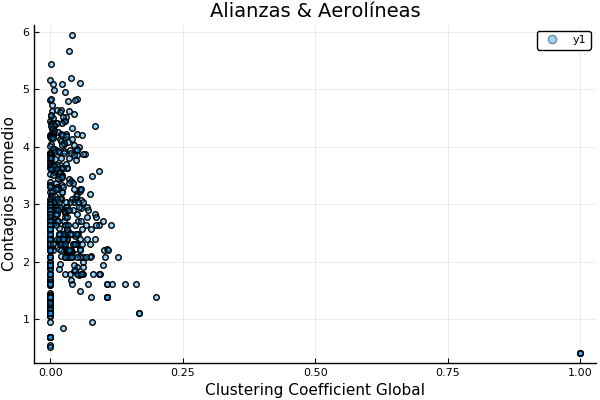

In [254]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 3:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, log(c[i]))
end


#equation(x) = -25.654*x + 27.1854 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Alianzas & Aerolíneas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:1:1, 
#    legend = true)


## Análisis de coberturas (Aerolíneas)

### Encontramos la regresión

In [109]:
reg_gcc_aer = regresion_lineal("Aerolíneas", "Global Clustering Coefficient")

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
              Estimate  Std.Error  t value Pr(>|t|)
(Intercept)    0.89942 0.00914885  98.3097   <1e-99
x1           -0.148365   0.107731 -1.37718   0.1691


In [ ]:
coef_r = round.(coef(reg_gcc_aer), digits=6)

In [110]:
r_2 = round.(r2(reg_gcc_aer), digits=5)

0.00364

### Gráfica de cobertura (Global Clustering Coefficient vs. Cobertura. Aerolíneas)

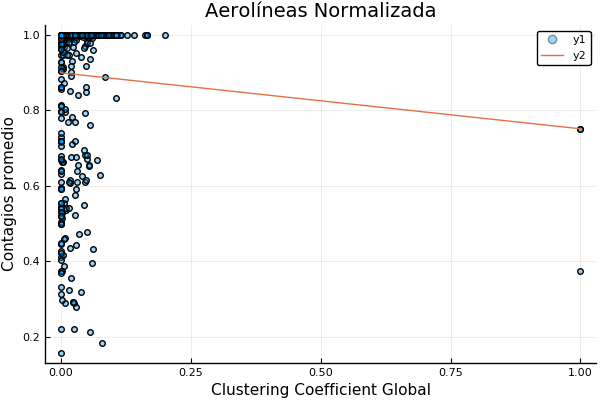

In [255]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 9] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.148365*x + 0.89942 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas Normalizada",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
plot!(equation, 0:0.1:1, 
    legend = true)


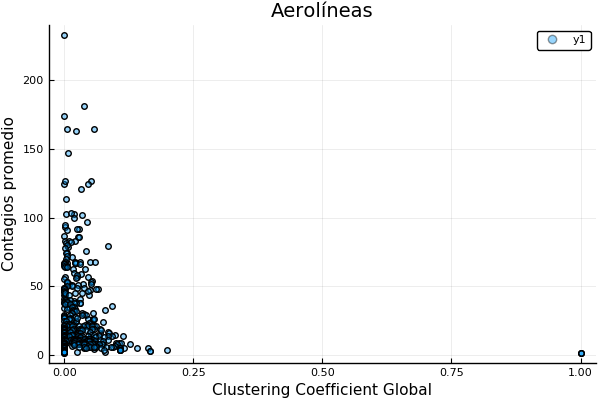

In [256]:

w = tabla_info_net[:, 7] #Nodos
c = tabla_info_net[:, 8] #Coberturas

x = Array{Float64}(undef, 0)
y = Array{Float64}(undef, 0)
for i in 6:length(lista_aerolineas)
    x = push!(x, w[i])
    y = push!(y, c[i])
end


equation(x) = -0.148365*x + 0.89942 #

scatter(x, y,
    #color = "#0f87bf",
    title = "Aerolíneas",
    xlabel = "Clustering Coefficient Global",
    ylabel = "Contagios promedio",
    legend = true,
    #size = (500,500),
    #aspect_ratio= 1,
    alpha = 0.4)
#plot!(equation, 0:0.1:1, 
 #   legend = true)


### Similitud entre las redes de Aerolíneas (monocapas). Coeficiente de Jaccard

$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

donde $A$ y $B$ son conjuntos

#### Tabla de coeficientes de Jaccard de las aerolíneas

In [114]:
#Checar

j_nodo = []
j_enlace = []
nombres = []


j_nodo = push!(j_nodo, "Jaccard C. Nodes")

j_enlace = push!(j_enlace, "Jaccard C. Links")

nombres =  push!(nombres, "Airline Codes")


k = 0

for i in 6:length(lista_aerolineas)
    
    nombres = push!(nombres, lista_aerolineas[i])
    
    inters_nodo = abs(tabla_info_net[i, 2])    
    #@show inters_nodo
    suma_nodo = abs(tabla_info_net[2, 2]) + abs(tabla_info_net[i, 2])
    #@show suma_nodo
    jaccy_nodo = inters_nodo / (suma_nodo - inters_nodo)
    #@show jaccy_nodo
    j_nodo = push!(j_nodo, jaccy_nodo)
    #@show j_nodo
    
    inters_enlace = abs(tabla_info_net[i, 3])
    suma_enlace = abs(tabla_info_net[2, 3]) + abs(tabla_info_net[i, 3])
    jaccy_enlace = inters_enlace / (suma_enlace - inters_enlace)
    j_enlace = push!(j_enlace, jaccy_enlace)
    #@show j_enlace
    

end

jaccard_tabla = hcat(nombres, j_nodo, j_enlace)

return jaccard_tabla

522×3 Array{Any,2}:
 "Airline Codes"   "Jaccard C. Nodes"   "Jaccard C. Links"
 "AA"             0.0843099            0.0382256          
 "TK"             0.078776             0.0163177          
 "DL"             0.0748698            0.0346297          
 "MU"             0.0625               0.0317288          
 "CZ"             0.0611979            0.0374702          
 "UA"             0.0598958            0.0273472          
 "FR"             0.0572917            0.0750612          
 "BA"             0.0569661            0.011241           
 "AF"             0.0559896            0.0136585          
 "LH"             0.0553385            0.0153205          
 "CA"             0.0546875            0.0237512          
 "SU"             0.0481771            0.0135376          
 ⋮                                                        
 "H7"             0.000651042          6.04357e-5         
 "GY"             0.000651042          6.04357e-5         
 "EW"             0.000651042       

### Distribución de grado

In [ ]:
function plot_distrib(distrib, tipo::String, titulo::String, color::String) #M::Array{Int64,2}

    distribucion = distrib

    graph = scatter(distribucion, fillcolor = color, markersize = 1, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (0,250), #obtener límites
    ylims = (0,850)) #obtener límites
end

In [ ]:
distrib_in_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_in_degree.csv", ',', Int64);
distrib_in_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_in_degree.csv", ',', Int64);

In [ ]:
hist_in_degree_G = plot_distrib(distrib_in_degree_G, "in", "Global In degree distrib.", "black");
hist_in_degree_SA = plot_distrib(distrib_in_degree_SA, "in", "Star Alliance In degree distrib.", "grey");
hist_in_degree_ST = plot_distrib(distrib_in_degree_ST, "in", "Sky Team In degree distrib.", "blue");
hist_in_degree_OW = plot_distrib(distrib_in_degree_OW, "in", "oneworld In degree distrib.", "purple");

In [ ]:
plot(hist_in_degree_G,hist_in_degree_SA,hist_in_degree_ST,hist_in_degree_OW,layout=(2,2),legend=false)

In [ ]:
distrib_out_degree_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_out_degree.csv", ',', Int64);
distrib_out_degree_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_out_degree.csv", ',', Int64);

In [ ]:
hist_out_degree_G = plot_distrib(distrib_out_degree_G, "out", "Global Out degree distrib.", "black");
hist_out_degree_SA = plot_distrib(distrib_out_degree_SA, "out", "Star Alliance Out degree distrib.", "grey");
hist_out_degree_ST = plot_distrib(distrib_out_degree_ST, "out", "Sky Team Out degree distrib.", "blue");
hist_out_degree_OW = plot_distrib(distrib_out_degree_OW, "out", "oneworld Out degree distrib.", "purple");

In [ ]:
plot(hist_out_degree_G,hist_out_degree_SA,hist_out_degree_ST,hist_out_degree_OW,layout=(2,2),legend=false)

In [ ]:
polyfit(x::Vector, y::Vector, deg::Int) = collect(v ^ p for v in x, p in 0:deg) \ y
x = [3072, 934, 900, 698]
y = [544.464, 384.997, 289.527, 142.492]
@show polyfit(x, y, 2)

### Gráficas

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y1 = [tabla_info_net[2,2], tabla_info_net[3,2], tabla_info_net[4,2], tabla_info_net[5,2]]
y2 = [tabla_info_net[2,3], tabla_info_net[3,3], tabla_info_net[4,3], tabla_info_net[5,3]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y1, alpha=0.7, line=(:dot, 1),marker=([:circle :d]), markersize=4,legendtitle="Key", label="Nodes", xlabel="Graph", ylabel="", title="Graph structure")
plot!(x, y2, alpha=0.7, line=(:dot, 1),marker=([:hex :d]), markersize=4, label="Links")
#plot!(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=4, label="Jaccard coef. Nodes")
#plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=4, label="Jaccard coef. Links")
#plot!(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, label="Density")

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y3 = [tabla_info_net[2,4], tabla_info_net[3,4], tabla_info_net[4,4], tabla_info_net[5,4]]
y4 = [tabla_info_net[2,5], tabla_info_net[3,5], tabla_info_net[4,5], tabla_info_net[5,5]]
#y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y3, alpha=0.7, line=(:dot, 1),marker=([:ltriangle :d]), markersize=5, legendtitle="Key", label="Jaccard coef. Nodes", xlabel="Graph", ylabel="Jaccard coefficient", title="Jaccard coefficient distrib.")
plot!(x, y4, alpha=0.7, line=(:dot, 1),marker=([:dtriangle :d]), markersize=5, label="Jaccard coef. Links")

In [ ]:
x = [tabla_info_net[2,1], tabla_info_net[3,1], tabla_info_net[4,1], tabla_info_net[5,1]]
y5 = [tabla_info_net[2,6], tabla_info_net[3,6], tabla_info_net[4,6], tabla_info_net[5,6]]
plot(x, y5, alpha=0.7, line=(:dot, 1),marker=([:diamond :d]), markersize=4, legend=false, xlabel="Graph", ylabel="Density", title="Density distrib.")

* Entre más similar es la red de la alianza o aerolínea con la red global, la cobertura o área de contagio es mayor.
* La densidad no pareciera que tiene relación con el área de infección.

In [ ]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

In [ ]:
x1 = ["Global"] 
x2 = ["Star Alliance"]
x3 = ["Sky Team"]
x4 = ["oneworld"]
y1 = [layer_cov_G[1]]
y2 = [layer_cov_SA[1]]
y3 = [layer_cov_ST[1]]
y4 = [layer_cov_OW[1]]
bar(x1,y1, color="black", alpha=0.7)
bar!(x2,y2, color="grey", alpha=0.7)
bar!(x3,y3, color="blue", alpha=0.7)
bar!(x4,y4, color="purple", alpha=0.7)

In [ ]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y, 
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

In [ ]:
x1 = ["Healthy", "Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y1 = [82.277, 5.191, 3.108, 4.786, 4.638]
pie(x1, y1, title="Total", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

In [ ]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

In [ ]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)

In [ ]:
x1 = ["Healthy"]
y1 = [82.277]
x2 = ["Inf. Global", "Inf. Star Alliance", "Inf. Sky Team", "Inf. oneworld"]
y2 = [3.191, 3.108, 4.786, 5.638]
pie(x1, y1, title="Total", l=0.5)
pie!(x2, y2)